# Construction de la base de données jeux vidéo
Ici nous allons créer un support de travail concernant les jeux vidéos

Le jeu de donnée mis à disposition s'arrête en 2016, je viens donc le compléter avec les données issues de Kaggle, VGChartz.

Importation automatique du jeu de données depuis Kaggle

Ce bloc permet de télécharger automatiquement un **jeu de données depuis Kaggle** (ici : `video-game-sales-2024`) dans un environnement Google Colab.

---

Étapes du script

1. Configuration de l’environnement
- On définit une variable d’environnement `KAGGLE_CONFIG_DIR` qui pointe vers le dossier contenant le fichier `kaggle.json`.
- Ce fichier contient tes **identifiants API Kaggle** (nécessaires pour accéder à l’API Kaggle).

2. Installation du package `kaggle`
- La bibliothèque `kaggle` est installée via `pip` si elle n'est pas déjà disponible.

3. Téléchargement du dataset
- On utilise la commande :
  ```bash
  kaggle datasets download -d asaniczka/video-game-sales-2024


In [ ]:
import os
import zipfile

# Définir le chemin du fichier kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = "/content/Raw"

# Installer la bibliothèque Kaggle
!pip install kaggle

# Télécharger le jeu de données
!kaggle datasets download -d asaniczka/video-game-sales-2024

# Décompresser le fichier téléchargé
with zipfile.ZipFile("video-game-sales-2024.zip", 'r') as zip_ref:
    zip_ref.extractall("video_game_sales_2024")


Dataset URL: https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024
License(s): ODC Attribution License (ODC-By)
  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 599MB/s]


Chargement du fichier `vgchartz-2024.csv`

Ce bloc permet de charger le jeu de données `vgchartz-2024.csv`, téléchargé depuis Kaggle, et d’en afficher les premières informations.

---

Étapes du script

1. Chargement du fichier CSV
- On utilise la bibliothèque `pandas` pour lire le fichier situé dans le dossier extrait :  
  ```python
  df_new = pd.read_csv("video_game_sales_2024/vgchartz-2024.csv")


In [ ]:
import pandas as pd

# Charger le fichier CSV
df_new = pd.read_csv("video_game_sales_2024/vgchartz-2024.csv")

# Afficher les premières lignes
df_new.info()
df_new.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal_sales  other_sales release_date last_update  
0      6.37      0.99       9.85         3.12   2013-09-17         NaN  
1      6.06      0.60       9.71         3.02   2014-11-18  2018-01-03  
2      8.41      0.47       5.49         1.78   2002-10-28         NaN  
3      9.06      0.06       5.33         1.42   2013-09-17         NaN  
4      6.18      0.41       6.05         2.44   2015-11-06  2018-01-14

Chargement de l'historique des ventes de jeux vidéo (1980–2016)

Ce bloc permet de charger un **fichier Excel historique** contenant les ventes de jeux vidéo sur la période **1980 à 2016**.

---

Étapes du script

1. Chargement du fichier Excel
- On utilise `pandas.read_excel()` pour lire la feuille nommée `"vgsales"` depuis le fichier :  
  `/content/Raw/VideoGame_Sales_1980-2016.xlsx`

  ```python
  df_old = pd.read_excel(..., sheet_name="vgsales")


In [ ]:
df_old = pd.read_excel("/content/Raw/VideoGame_Sales_1980-2016.xlsx", sheet_name="vgsales")
df_old.info()
df_old.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16545 entries, 0 to 16544
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16545 non-null  int64  
 1   Name          16545 non-null  object 
 2   Platform      16545 non-null  object 
 3   Year          16274 non-null  float64
 4   Genre         16545 non-null  object 
 5   Publisher     16487 non-null  object 
 6   Constructeur  16545 non-null  object 
 7   Portable      16545 non-null  object 
 8   NA_Sales      16545 non-null  float64
 9   EU_Sales      16545 non-null  float64
 10  JP_Sales      16545 non-null  float64
 11  Other_Sales   16545 non-null  float64
 12  Global_Sales  16545 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.6+ MB


Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

  Constructeur Portable   NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0     Nintendo       Non   41.4900   27.8592    3.6569       8.2908   
1     Nintendo       Non   29.9524    3.4726    6.6738       0.8085   
2     Nintendo       Non   15.2160   12.4936    3.7900       3.3762   
3     Nintendo       Non   15.7500   11.0100    3.1816       3.0784   
4     Nintendo       Oui   11.2700    9.0678    9.8112       0.9900   

   Global_Sales  
0       81.2969  
1       40.9073  
2       34.8758  
3       33.0200  
4       31.1390

In [ ]:
print(df_new.columns.tolist())


['img', 'title', 'console', 'genre', 'publisher', 'developer', 'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_date', 'last_update']


Fusion des jeux vidéo 1980–2024 : harmonisation & consolidation

Ce bloc fusionne deux bases de données complémentaires sur les ventes de jeux vidéo :

- `df_old` : historique des ventes de **1980 à 2016**
- `df_new` : données issues du fichier `vgchartz-2024.csv` couvrant **les années récentes (2016–2024)**

---

Étapes détaillées

1. Harmonisation des noms de colonnes
- Les noms des colonnes de `df_new` sont renommés pour être compatibles avec `df_old`.
- Exemple : `title` devient `Name`, `console` devient `Platform`, etc.
- Le champ `developer` est temporairement renommé en `Constructeur` pour fusionner proprement.

2. Extraction de l’année
- La colonne `release_date` est convertie au format datetime.
- On en extrait uniquement l’année (`Year`), pour aligner avec le format de `df_old`.

3. Sélection des colonnes communes
- Seules les colonnes **partagées entre les deux jeux de données** sont conservées :
  - `Name`, `Platform`, `Year`, `Genre`, `Publisher`, `Constructeur`, `NA_Sales`, `EU_Sales`, etc.

4. Nettoyage des noms de colonnes
- Suppression des espaces superflus
- Standardisation des noms (facultatif) : remplacement des espaces par des underscores

5. Ajout d’un indicateur d’origine (`Source`)
- `df_old` est marqué comme provenant de `1980-2016`
- `df_new` est marqué comme `2016-2024`

6. Fusion des bases
- Les deux jeux de données sont concaténés verticalement (`pd.concat`) pour former `df_all`.
- L’option `ignore_index=True` permet de reconstruire un index propre.

7. Vérification
- Affiche le **nombre total de jeux fusionnés**
- Montre un aperçu du DataFrame résultant (`df_all.head()`)

---

Objectif

- Obtenir une base de données complète **de 1980 à 2024**
- Faciliter les analyses évolutives (ex : évolution des ventes par genre ou plateforme)
- Permettre des visualisations ou modèles prédictifs sur un historique unifié

---

Prêt pour l’analyse

Une fois cette fusion effectuée, `df_all` peut être utilisé comme base unique pour :
- Agrégations par année / genre / plateforme
- Calculs de tendances ou projections
- Visualisations comparatives longues (ex : avant/après 2016)


In [ ]:
# 1. Harmonisation des noms de colonnes
df_new.rename(columns={
    'title': 'Name',
    'console': 'Platform',
    'genre': 'Genre',
    'publisher': 'Publisher',
    'developer': 'Constructeur',
    'na_sales': 'NA_Sales',
    'eu_sales': 'EU_Sales',
    'jp_sales': 'JP_Sales',
    'other_sales': 'Other_Sales',
    'total_sales': 'Global_Sales'
}, inplace=True)

# 2.Extraire l’année depuis la release_date
df_new['Year'] = pd.to_datetime(df_new['release_date'], errors='coerce').dt.year

# 3.Colonnes à conserver
colonnes_communes = ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Constructeur',
                     'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# 4.Nettoyage des noms de colonnes
df_new.columns = df_new.columns.str.strip()  # Supprimer les espaces
df_new.columns = df_new.columns.str.replace(' ', '_')  # Facultatif : standardisation


# 5. Ajout d'une colonne source
df_old["Source"] = "1980-2016"
df_new["Source"] = "2016-2024"

# 6. Fusion des deux DataFrames
df_all = pd.concat([df_old, df_new], ignore_index=True)

# 7. Vérification du résultat
print(f"Nombre total de jeux fusionnés : {len(df_all)}")
df_all.head()


Nombre total de jeux fusionnés : 80561


Rank                      Name Platform    Year         Genre Publisher  \
0   1.0                Wii Sports      Wii  2006.0        Sports  Nintendo   
1   2.0         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2   3.0            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3   4.0         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4   5.0  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

  Constructeur Portable   NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0     Nintendo       Non   41.4900   27.8592    3.6569       8.2908   
1     Nintendo       Non   29.9524    3.4726    6.6738       0.8085   
2     Nintendo       Non   15.2160   12.4936    3.7900       3.3762   
3     Nintendo       Non   15.7500   11.0100    3.1816       3.0784   
4     Nintendo       Oui   11.2700    9.0678    9.8112       0.9900   

   Global_Sales     Source  img  critic_score  pal_sales release_date  \
0       81.2969  1980-2016  NaN           NaN        NaN          NaN   
1       40.9073  1980-2016  NaN           NaN        NaN          NaN   
2       34.8758  1980-2016  NaN           NaN        NaN          NaN   
3       33.0200  1980-2016  NaN           NaN        NaN          NaN   
4       31.1390  1980-2016  NaN           NaN        NaN          NaN   

  last_update  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

Top 10 des plateformes par ventes globales (1980–2024)

Ce graphique met en évidence les **plateformes ayant généré le plus de ventes mondiales cumulées**, sur l’ensemble de la période 1980 à 2024, à partir du DataFrame fusionné `df_all`.

---

Étapes du traitement

1. Agrégation des ventes
- Le DataFrame `df_all` est regroupé par **plateforme (`Platform`)**
- Les ventes (`Global_Sales`) sont **sommées** pour chaque plateforme
- Le classement est trié par ordre décroissant, puis **limité aux 10 premières plateformes**

2. Visualisation
- Un **graphique en barres verticales** est utilisé pour représenter le total des ventes globales par plateforme.
- Les ventes sont exprimées en **millions d’unités** (selon les valeurs d’origine).
- Le graphique est configuré pour une **meilleure lisibilité** (grille horizontale, rotation des labels, etc.)

---

Objectifs

- Identifier les plateformes ayant connu **le plus de succès commercial** sur la période complète
- Comparer les grandes consoles historiques (ex : PS2, DS, Switch) avec les plateformes récentes
- Soutenir une **analyse stratégique du marché** des supports de jeu dans le temps

---

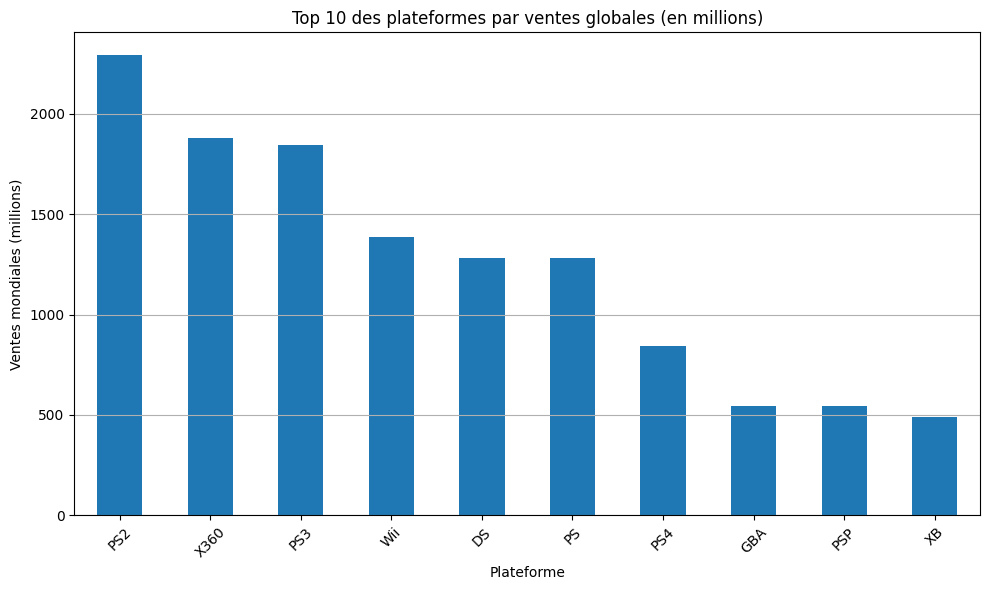

In [ ]:
import matplotlib.pyplot as plt

# Regrouper les ventes par plateforme
top_platforms = df_all.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)

# Affichage
plt.figure(figsize=(10,6))
top_platforms.plot(kind='bar')
plt.title("Top 10 des plateformes par ventes globales (en millions)")
plt.ylabel("Ventes mondiales (millions)")
plt.xlabel("Plateforme")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Évolution des ventes de jeux vidéo par année (1980–2024)

Ce graphique montre l’évolution du **volume total des ventes de jeux vidéo** par année de sortie, sur la période **1980 à 2024**.  
Les données sont issues du DataFrame `df_all`, qui regroupe les ventes issues des bases historiques (1980–2016) et récentes (2016–2024).

---

Étapes du traitement

1. Agrégation des ventes annuelles
- Les ventes (`Global_Sales`) sont **sommées** par année (`Year`)
- Cela permet de visualiser la **dynamique du marché** sur le long terme

2. Visualisation
- Un **graphique en ligne** (`line plot`) est utilisé pour représenter l'évolution des ventes
- L’axe des abscisses correspond aux années de sortie des jeux
- L’axe des ordonnées correspond au total des ventes (en millions d’unités)
- Une grille est ajoutée pour **faciliter la lecture des tendances**

---

Objectifs

- Identifier les **pics de ventes** (ex : sortie de consoles majeures, franchises emblématiques)
- Détecter les **phases de ralentissement ou de croissance**
- Fournir une **vue d’ensemble** du marché vidéoludique sur plusieurs décennies

---

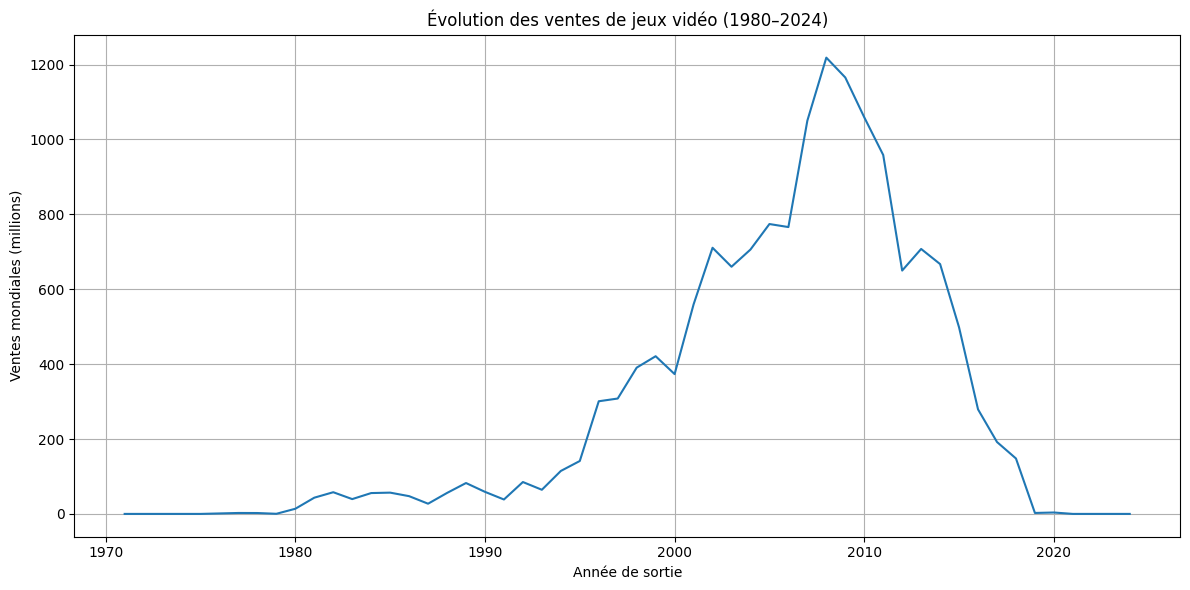

In [ ]:
# Regrouper les ventes par année
sales_per_year = df_all.groupby("Year")["Global_Sales"].sum()

# Affichage
plt.figure(figsize=(12,6))
sales_per_year.plot()
plt.title("Évolution des ventes de jeux vidéo (1980–2024)")
plt.ylabel("Ventes mondiales (millions)")
plt.xlabel("Année de sortie")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(df_all['Platform'].value_counts().head(20))

Platform
PC      13577
PS2      5725
DS       5451
PS       3903
PS3      3228
PS4      3212
PSP      3016
Wii      3001
X360     2994
GBA      2481
NS       2337
XOne     2176
XBL      2120
PSN      2004
XB       1806
3DS      1701
GB       1697
PSV      1511
SNES     1450
GC       1219
Name: count, dtype: int64


In [ ]:
zero_sales_pc = (df_all['Platform'] == 'PC') & (df_all['Global_Sales'] == 0)
print(f"{zero_sales_pc.sum()} jeux PC ont 0 ventes globales sur {df_all[df_all['Platform'] == 'PC'].shape[0]}")


621 jeux PC ont 0 ventes globales sur 13577


La base ne prend pas en compte les ventes de jeux numérique, je l'enrichis donc avec un dataset supplémentaire se basant sur les ventes de la plateforme steam (leader sur le marché pc) via cette URL : https://gamalytic.com/


Intégration des données Steam (Gamalytic) dans la base consolidée

Ce bloc a pour objectif d’intégrer les données de ventes issues de **Steam via la plateforme Gamalytic**, en les harmonisant avec la base principale `df_all`, afin de produire une base unifiée nommée `df_all_merged`.

---

Étapes du traitement

1. Harmonisation des noms de colonnes
- Renommage des colonnes de `df_steam` pour correspondre à la structure de `df_all`
- Exemple :
  - `'Copies Sold'` → `'Global_Sales'`
  - `'First Release Date'` → `'release_date'`

2. Ajout des colonnes manquantes
- Pour assurer la **compatibilité structurelle**, les colonnes présentes dans `df_all` mais absentes dans `df_steam` sont ajoutées avec des valeurs `None`
- Exemple : `NA_Sales`, `JP_Sales`, `Publisher`, etc.

3. Extraction du genre principal
- La colonne `Genres` de Gamalytic est une **chaîne représentant une liste**
- On utilise `eval(x)[0]` pour extraire le **genre principal (premier élément de la liste)**

4. Extraction de l’année
- L’année de sortie est extraite depuis la colonne `release_date` pour peupler la colonne `Year`

5. Réorganisation des colonnes
- Réagencement des colonnes pour correspondre à la structure de `df_all`
- Objectif : permettre une concaténation sans perte ou confusion

---

Fusion des bases

- On concatène les deux bases (`df_all` + `df_steam_ready`) dans `df_all_merged`
- Chaque entrée est enrichie d’un champ `Source` (`1980–2016`, `2016–2024`, ou `Gamalytic`) pour traçabilité

---

Nettoyage des doublons

- Vérification de la présence de doublons (`duplicated`)
- Affichage des éventuels doublons pour inspection manuelle
- ⚠️ À ce stade, aucun dédoublonnage automatique n’est fait — à prévoir si besoin

---

Unification du nom du jeu

- La colonne `name` (Steam) est fusionnée dans la colonne `Name` (base globale)
- Puis, la colonne `name` est supprimée pour éviter les doublons

---

Filtrage final

- On conserve uniquement les colonnes essentielles pour les futures analyses :
  - `Name`, `Platform`, `Year`, `Genre`, `Global_Sales`, `Source`
- Le DataFrame final `df_all_merged` est prêt à être utilisé pour :
  - des agrégations
  - des visualisations
  - des projections multi-sources

---

Remarque

L’intégration manuelle et traçable des données Steam permet de compléter la base globale avec des titres **PC-only**, souvent absents des bases traditionnelles comme VGChartz. Cela donne une **vision plus complète et actuelle du marché**.



In [ ]:
df_steam = pd.read_excel("/content/Raw/steam_dataset_final.xlsx", engine="openpyxl")
df_steam.head()

Name  Steam Id  First Release Date  Price  Copies Sold  \
0     Counter-Strike 2       730 2012-05-01 02:00:00    0.0    302856247   
1  PUBG: BATTLEGROUNDS    578080 2017-03-01 01:00:00    0.0    163026946   
2               Dota 2       570 2011-08-01 02:00:00    0.0    215973857   
3        Apex Legends™   1172470 2020-11-04 06:00:00    0.0     67031471   
4            Destiny 2   1085660 2019-10-01 06:00:00    0.0     36854257   

                                              Genres  
0                          ["Action","Free To Play"]  
1  ["Action","Adventure","Massively Multiplayer",...  
2               ["Action","Strategy","Free To Play"]  
3              ["Action","Adventure","Free To Play"]  
4              ["Action","Adventure","Free To Play"]

In [ ]:
#Renommer les colonnes pour correspondre à df_all
df_steam_clean = df_steam.rename(columns={
    'Name': 'name',
    'Steam Id': 'steam_id',
    'First Release Date': 'release_date',
    'Copies Sold': 'Global_Sales'
})

In [ ]:
#Ajouter les colonnes manquantes à df_steam_clean pour matcher df_all
df_steam_clean['Platform'] = 'PC'
df_steam_clean['NA_Sales'] = None
df_steam_clean['EU_Sales'] = None
df_steam_clean['JP_Sales'] = None
df_steam_clean['Other_Sales'] = None
df_steam_clean['Genre'] = df_steam['Genres'].apply(lambda x: eval(x)[0] if isinstance(x, str) and x.startswith('[') and len(eval(x)) > 0 else x) #eval(x) transforme la chaîne en liste Python, et x[0] prend le genre principal (le premier de la liste)
df_steam_clean['Publisher'] = None
df_steam_clean['Constructeur'] = None
df_steam_clean['Source'] = 'Gamalytic'


In [ ]:
#Extraire l’année
df_steam_clean['Year'] = pd.to_datetime(df_steam_clean['release_date'], errors='coerce').dt.year

In [ ]:
#Réordonner les colonnes pour être cohérent avec df_all
colonnes_communes = ['name', 'Platform', 'Year', 'Genre', 'Publisher', 'Constructeur',
                     'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Source']

df_steam_ready = df_steam_clean[colonnes_communes]

In [ ]:
#Concaténer
df_all_merged = pd.concat([df_all, df_steam_ready], ignore_index=True)
print(f"Nombre total de jeux après fusion : {len(df_all_merged)}")
df_all_merged.head()


<ipython-input-18-b100b73c5c1f>:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all_merged = pd.concat([df_all, df_steam_ready], ignore_index=True)


Nombre total de jeux après fusion : 178725


Rank                      Name Platform    Year         Genre Publisher  \
0   1.0                Wii Sports      Wii  2006.0        Sports  Nintendo   
1   2.0         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2   3.0            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3   4.0         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4   5.0  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

  Constructeur Portable   NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0     Nintendo       Non   41.4900   27.8592    3.6569       8.2908   
1     Nintendo       Non   29.9524    3.4726    6.6738       0.8085   
2     Nintendo       Non   15.2160   12.4936    3.7900       3.3762   
3     Nintendo       Non   15.7500   11.0100    3.1816       3.0784   
4     Nintendo       Oui   11.2700    9.0678    9.8112       0.9900   

   Global_Sales     Source  img  critic_score  pal_sales release_date  \
0       81.2969  1980-2016  NaN           NaN        NaN          NaN   
1       40.9073  1980-2016  NaN           NaN        NaN          NaN   
2       34.8758  1980-2016  NaN           NaN        NaN          NaN   
3       33.0200  1980-2016  NaN           NaN        NaN          NaN   
4       31.1390  1980-2016  NaN           NaN        NaN          NaN   

  last_update name  
0         NaN  NaN  
1         NaN  NaN  
2         NaN  NaN  
3         NaN  NaN  
4         NaN  NaN

In [ ]:
#Verifier les doublons
df_all_merged.duplicated().sum()
df_all_merged[df_all_merged.duplicated(keep=False)]


Rank Name Platform    Year   Genre Publisher Constructeur Portable   \
159159   NaN  NaN       PC  2019.0  Action      None         None       NaN   
164123   NaN  NaN       PC  2019.0  Action      None         None       NaN   

        NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales     Source  \
159159       NaN       NaN       NaN          NaN           1.0  Gamalytic   
164123       NaN       NaN       NaN          NaN           1.0  Gamalytic   

        img  critic_score  pal_sales release_date last_update         name  
159159  NaN           NaN        NaN          NaN         NaN  Destruction  
164123  NaN           NaN        NaN          NaN         NaN  Destruction

In [ ]:
#créer une colonne unifiée
# 1. Créer une colonne unique 'Name' à partir des deux existantes
df_all_merged['Name'] = df_all_merged['Name'].fillna(df_all_merged['name'])

# 2. Supprimer la colonne 'name' devenue inutile
df_all_merged.drop(columns=['name'], inplace=True)

print(df_all_merged.columns.tolist())

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Constructeur', 'Portable ', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Source', 'img', 'critic_score', 'pal_sales', 'release_date', 'last_update']


Supprimons les colonnes non intéressante

In [ ]:
# Définir les colonnes à conserver
colonnes_a_conserver = [
    'Name', 'Platform', 'Year', 'Genre',
    'Global_Sales', 'Source'
]

# Filtrer le DataFrame
df_all_merged = df_all_merged[colonnes_a_conserver]

df_all_merged.head()


Name Platform    Year         Genre  Global_Sales  \
0                Wii Sports      Wii  2006.0        Sports       81.2969   
1         Super Mario Bros.      NES  1985.0      Platform       40.9073   
2            Mario Kart Wii      Wii  2008.0        Racing       34.8758   
3         Wii Sports Resort      Wii  2009.0        Sports       33.0200   
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing       31.1390   

      Source  
0  1980-2016  
1  1980-2016  
2  1980-2016  
3  1980-2016  
4  1980-2016

Nettoyage des doublons dans la base consolidée

Ce bloc permet de garantir l’unicité des lignes dans le DataFrame `df_all_merged` en supprimant les doublons à différents niveaux.

---

Étapes détaillées

1. Détection de doublons sur **toutes les colonnes**
- On commence par détecter les **lignes identiques à 100 %**
- Ces doublons sont supprimés avec `drop_duplicates()`
- Objectif : supprimer les copies exactes issues de concaténations répétées

2. Détection de doublons sur les **colonnes clés** : `['Name', 'Platform', 'Year']`
- On identifie les cas où **un même jeu est listé plusieurs fois pour une même plateforme et une même année**
- Exemple : un jeu apparaissant à la fois dans la base historique et dans la base Steam

3. Sélection de la **meilleure version** d’un jeu
- Pour chaque doublon (`Name`, `Platform`, `Year`), on conserve **la version avec le `Global_Sales` le plus élevé**
- Cela permet de privilégier la version **la plus complète ou la plus à jour**
- Cette logique est appliquée même si certaines lignes contiennent des `NaN` dans `Global_Sales`

4. Résultat final
- Le DataFrame nettoyé est nommé `df_jeux_uniques`
- Il contient uniquement des **jeux uniques par plateforme et par année**
- La validité du nettoyage est contrôlée via `duplicated(...).sum()` en fin de bloc

---

Objectif

- Obtenir un **jeu de données propre et non redondant**
- Éviter les biais dus aux doublons dans les analyses futures
- S'assurer que **chaque jeu est représenté une seule fois** pour chaque couple (`Nom`, `Plateforme`, `Année`)

---

In [ ]:
# Nombre total de doublons
df_all_merged.duplicated().sum()


np.int64(36)

In [ ]:
df_all_merged[df_all_merged.duplicated(keep=False)]

Name Platform    Year  \
18983   Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...       DS  2006.0   
18984   Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...       DS  2006.0   
28233       Itoi Shigesato no Bass Tsuri No. 1 Ketteihan!      N64  2000.0   
28234       Itoi Shigesato no Bass Tsuri No. 1 Ketteihan!      N64  2000.0   
30006                        Akko ni Omakase! Brain Shock       DS  2006.0   
...                                                   ...      ...     ...   
77956                     Battlezone II: Combat Commander       PC  1999.0   
77957                     Battlezone II: Combat Commander       PC  1999.0   
79811                                                   Z       PC  1996.0   
159159                                        Destruction       PC  2019.0   
164123                                        Destruction       PC  2019.0   

           Genre  Global_Sales     Source  
18983       Misc          0.66  2016-2024  
18984       Misc          0.66  2016-2024  
28233     Sports          0.07  2016-2024  
28234     Sports          0.07  2016-2024  
30006       Misc          0.04  2016-2024  
...          ...           ...        ...  
77956   Strategy           NaN  2016-2024  
77957   Strategy           NaN  2016-2024  
79811   Strategy           NaN  2016-2024  
159159    Action          1.00  Gamalytic  
164123    Action          1.00  Gamalytic  

[72 rows x 6 columns]

In [ ]:
#suppression des doublons
df_all_merged = df_all_merged.drop_duplicates()
df_all_merged[df_all_merged.duplicated(keep=False)]

Empty DataFrame
Columns: [Name, Platform, Year, Genre, Global_Sales, Source]
Index: []

In [ ]:
# Détection des doublons sur les colonnes essentielles
df_all_merged.duplicated(subset=['Name', 'Platform', 'Year']).sum()


np.int64(15430)

In [ ]:
# Sélectionner toutes les lignes doublonnées
df_doublons = df_all_merged[df_all_merged.duplicated(subset=['Name', 'Platform', 'Year'], keep=False)]

# Afficher les 20 premiers doublons pour inspection
df_doublons.sort_values(by=['Name', 'Platform', 'Year']).head(20)


Name Platform    Year         Genre  \
4815                          '98 Koshien       PS  1998.0        Sports   
20679                         '98 Koshien       PS  1998.0        Sports   
64890                    - Arcane Raise -       PC  2017.0  Role-Playing   
102543                   - Arcane Raise -       PC  2017.0     Adventure   
8227           .hack//G.U. Vol.1//Rebirth      PS2  2006.0  Role-Playing   
64837          .hack//G.U. Vol.1//Rebirth      PS2  2006.0  Role-Playing   
8225        .hack//G.U. Vol.3//Redemption      PS2  2007.0  Role-Playing   
24197       .hack//G.U. Vol.3//Redemption      PS2  2007.0  Role-Playing   
9075                          .hack//Link      PSP  2010.0  Role-Playing   
25294                         .hack//Link      PSP  2010.0  Role-Playing   
14533   .hack: Sekai no Mukou ni + Versus      PS3  2012.0        Action   
31409   .hack: Sekai no Mukou ni + Versus      PS3  2012.0      Fighting   
3728                           007 Racing       PS  2000.0        Racing   
19701                          007 Racing       PS  2000.0        Racing   
9374               007: Quantum of Solace       DS  2008.0        Action   
25577              007: Quantum of Solace       DS  2008.0        Action   
15359              007: Quantum of Solace       PC  2008.0        Action   
30652              007: Quantum of Solace       PC  2008.0        Action   
4548               007: Quantum of Solace      PS2  2008.0        Action   
20499              007: Quantum of Solace      PS2  2008.0       Shooter   

        Global_Sales     Source  
4815          0.4034  1980-2016  
20679         0.4100  2016-2024  
64890            NaN  2016-2024  
102543    13913.0000  Gamalytic  
8227          0.1751  1980-2016  
64837            NaN  2016-2024  
8225          0.1751  1980-2016  
24197         0.1700  2016-2024  
9075          0.1428  1980-2016  
25294         0.1400  2016-2024  
14533         0.0297  1980-2016  
31409         0.0300  2016-2024  
3728          0.5407  1980-2016  
19701         0.5300  2016-2024  
9374          0.1329  1980-2016  
25577         0.1300  2016-2024  
15359         0.0199  1980-2016  
30652         0.0300  2016-2024  
4548          0.4299  1980-2016  
20499         0.4300  2016-2024

In [ ]:
# Trouver les index des lignes avec le Global_Sales max par jeu unique, en ignorant les NaN
idx_max_sales = df_all_merged.groupby(['Name', 'Platform', 'Year'])['Global_Sales'].idxmax()

# Supprimer les valeurs NaN de idx_max_sales
idx_max_sales = idx_max_sales.dropna()

# Convertir les index en entiers pour éviter les problèmes de type
idx_max_sales = idx_max_sales.astype(int)

# Extraire les lignes correspondantes
df_jeux_uniques = df_all_merged.loc[idx_max_sales].reset_index(drop=True)

# Vérifier qu’il n’y a plus de doublons sur les colonnes 'Name', 'Platform', 'Year'
df_jeux_uniques.duplicated(subset=['Name', 'Platform', 'Year']).sum()


np.int64(0)

In [ ]:
# Afficher les lignes en double (si présentes)
df_jeux_uniques[df_jeux_uniques.duplicated(subset=['Name', 'Platform', 'Year'], keep=False)]


Empty DataFrame
Columns: [Name, Platform, Year, Genre, Global_Sales, Source]
Index: []

Nettoyage final, normalisation des ventes et export du jeu de données

Ce bloc effectue un **nettoyage complet et une mise à l’échelle cohérente** des données, en vue d’obtenir un jeu `df_jeux_final` prêt pour les analyses et visualisations finales.

---

Étapes du traitement

1. Vérification de la qualité des données

- `isna().sum()` : identification des **valeurs manquantes** par colonne
- `dtypes` : vérification des **types de données**
- `describe()` sur `Global_Sales` : permet de détecter d’éventuelles **valeurs aberrantes**

---

2. Normalisation des ventes (`Global_Sales`)

- Certaines sources (ex: `VGChartz`) expriment les ventes en **millions**, d’autres en **unités**
- Pour garantir la cohérence :
  - Les sources **`1980–2016` et `2016–2024`** sont **multipliées par 1 000**
  - Résultat : toutes les ventes sont désormais exprimées **en milliers d’unités**

---

3. Nettoyage des doublons (niveau `Name` + `Platform`)

- Même après suppression des doublons `Name + Platform + Year`, il peut rester des **doublons multi-années** (rééditions, mises à jour)
- On garde **la ligne avec le plus grand `Global_Sales`** par couple `Name + Platform`

---

4. Création de la base propre : `df_jeux_final`

- Ce DataFrame contient **une seule entrée par jeu et par plateforme**
- Il est prêt à être utilisé pour :
  - des analyses agrégées
  - des tableaux de bord
  - des projections

---

5. Export vers Excel

- Le fichier nettoyé est exporté sous le nom :  
  **`jeux_video_nettoye.xlsx`**
- Format Excel avec support de l’encodage via `openpyxl`

---

Remarque

Ce traitement assure une **cohérence parfaite entre les sources**, tout en évitant les biais liés à des ventes mal calibrées ou à des doublons.

> ✅ Résultat : une base fiable, homogène, et prête pour les traitements statistiques ou la dataviz.


In [ ]:
# Données manquantes
df_jeux_uniques.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Global_Sales    0
Source          0
dtype: int64

In [ ]:
# Type de données
df_jeux_uniques.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Global_Sales    float64
Source           object
dtype: object

In [ ]:
# Valeurs aberrantes ou incohérentes
df_jeux_uniques['Global_Sales'].describe()

count    1.202960e+05
mean     6.351352e+04
std      1.425637e+06
min      0.000000e+00
25%      6.000000e+00
50%      2.050000e+02
75%      2.500250e+03
max      3.028562e+08
Name: Global_Sales, dtype: float64

In [ ]:
# Mettre à l’échelle les ventes physiques (source 1980-2016)
df_jeux_uniques.loc[df_jeux_uniques['Source'] == '1980-2016', 'Global_Sales'] *= 1_000
# Mettre à l’échelle les ventes physiques (source 2016-2024)
df_jeux_uniques.loc[df_jeux_uniques['Source'] == '2016-2024', 'Global_Sales'] *= 1_000
df_jeux_uniques.groupby('Source')['Global_Sales'].describe()


count          mean           std  min   25%    50%      75%  \
Source                                                                      
1980-2016  10743.0    645.812371  2.003290e+03  9.6  72.1  202.9   552.85   
2016-2024  11510.0    309.315378  7.405468e+02  0.0  20.0   90.0   290.00   
Gamalytic  98043.0  77929.196638  1.578807e+06  0.0  68.0  512.0  4326.50   

                   max  
Source                  
1980-2016      81296.9  
2016-2024      15090.0  
Gamalytic  302856247.0

In [ ]:
# Trouver les doublons exacts sur ces colonnes
doublons = df_jeux_uniques[df_jeux_uniques.duplicated(subset=['Name', 'Platform'], keep=False)]

import pandas as pd
pd.set_option('display.max_rows', None)

# Affiche tous les doublons groupés
doublons.sort_values(by=['Name', 'Platform'])


Name Platform    Year  \
86                           .hack//G.U. Vol.2//Reminisce      PS2  2006.0   
87                           .hack//G.U. Vol.2//Reminisce      PS2  2007.0   
88                .hack//G.U. Vol.2//Reminisce (jp sales)      PS2  2006.0   
89                .hack//G.U. Vol.2//Reminisce (jp sales)      PS2  2007.0   
91                                .hack//Infection Part 1      PS2  2002.0   
92                                .hack//Infection Part 1      PS2  2003.0   
94                                 .hack//Mutation Part 2      PS2  2002.0   
95                                 .hack//Mutation Part 2      PS2  2003.0   
96                                 .hack//Outbreak Part 3      PS2  2002.0   
97                                 .hack//Outbreak Part 3      PS2  2003.0   
98            .hack//Quarantine Part 4: The Final Chapter      PS2  2003.0   
99            .hack//Quarantine Part 4: The Final Chapter      PS2  2004.0   
186                                     100 Classic Books       DS  2008.0   
187                                     100 Classic Books       DS  2010.0   
374                            101-in-1 Explosive Megamix       DS  2008.0   
375                            101-in-1 Explosive Megamix       DS  2009.0   
378                         101-in-1 Sports Party Megamix      Wii  2010.0   
379                         101-in-1 Sports Party Megamix      Wii  2011.0   
471                                               15 Days       PC  2009.0   
472                                               15 Days       PC  2015.0   
491                18 Wheels of Steel: American Long Haul       PC  2007.0   
492                18 Wheels of Steel: American Long Haul       PC  2008.0   
493                            18 Wheels of Steel: Convoy       PC  2005.0   
494                            18 Wheels of Steel: Convoy       PC  2016.0   
496                 18 Wheels of Steel: Extreme Trucker 2       PC  2011.0   
497                 18 Wheels of Steel: Extreme Trucker 2       PC  2015.0   
581     2 in 1 Combo Pack: Sonic Heroes / Super Monkey...       XB  2004.0   
582     2 in 1 Combo Pack: Sonic Heroes / Super Monkey...       XB  2005.0   
857                3D Tank Warfare Simulator Panzer Front       PS  1999.0   
858                3D Tank Warfare Simulator Panzer Front       PS  2001.0   
1092                                         7 Wonders II       DS  2009.0   
1093                                         7 Wonders II       DS  2010.0   
1094                                         7 Wonders II       PC  2007.0   
1095                                         7 Wonders II       PC  2008.0   
1097                       7 Wonders of the Ancient World       PC  2007.0   
1098                       7 Wonders of the Ancient World       PC  2014.0   
1137                             7th Dragon III Code: VFD      3DS  2015.0   
1138                             7th Dragon III Code: VFD      3DS  2016.0   
1243            999: Nine Hours, Nine Persons, Nine Doors       DS  2009.0   
1244            999: Nine Hours, Nine Persons, Nine Doors       DS  2010.0   
1278                                         A Bug's Life      N64  1998.0   
1279                                         A Bug's Life      N64  1999.0   
1743                                      A Vampyre Story       PC  2008.0   
1744                                      A Vampyre Story       PC  2014.0   
1761                                  A Walk in the Woods       PC  2018.0   
1762                                  A Walk in the Woods       PC  2020.0   
1848                                              A-Train       PS  1995.0   
1849                                              A-Train       PS  1996.0   
1852                                            A-Train 6      PS2  2000.0   
1853                                            A-Train 6      PS2  2004.0   
2307                                                ASTRA       PC  2021.0 

In [ ]:
# Ne gardons que les jeux enregistrant le plus de vente
idx_max_sales = df_jeux_uniques.groupby(['Name', 'Platform'])['Global_Sales'].idxmax()
df_jeux_final = df_jeux_uniques.loc[idx_max_sales].reset_index(drop=True)
df_jeux_final.head()

Name Platform    Year    Genre  Global_Sales     Source
0                     1942      NES  1985.0  Shooter        1037.4  1980-2016
1           Fieldrunners 2       PC  2013.0   Action       28980.0  Gamalytic
2      Goddess detective 2       PC  2023.0    Indie         139.0  Gamalytic
3      Magic pal and great       PC  2024.0   Action          26.0  Gamalytic
4   Promise with My Sister       PC  2024.0   Casual         565.0  Gamalytic

In [ ]:
df_jeux_uniques.to_excel("jeux_video_nettoye.xlsx", index=False, engine='openpyxl')

Fusion & normalisation des bases : `jeux_video_nettoye` + `vgchartz_master`

Ce bloc vise à comparer ou fusionner deux bases complémentaires de ventes de jeux vidéo :

- `jeux_video_nettoye.xlsx` : base consolidée et nettoyée (1980–2024)
- `vgchartz_master.xlsx` : base brute issue du master Kaggle VGChartz

---

Étapes du traitement

1. Chargement des deux fichiers
- Les deux fichiers Excel sont lus dans des DataFrames distincts :
  - `df_jeux` : version nettoyée et enrichie manuellement
  - `df_vg` : version brute issue de VGChartz master

---

2. Normalisation des colonnes

La fonction `normalize_dataframe(df)` applique un traitement standardisé :
- Nettoyage des chaînes (`strip()`, homogénéisation des majuscules/minuscules)
- Uniformisation des types :
  - `Year` → entier arrondi
  - `Global_Sales` → conversion sécurisée en nombre entier
  - `Genre`, `Platform`, `Source` → format lisible et uniforme

Cela permet de rendre les deux jeux **compatibles pour analyse ou fusion**.

---

3. Concaténation des deux bases
- Les deux jeux de données sont fusionnés sans dédoublonnage pour l’instant (`pd.concat`)
- Le résultat est stocké dans `df_concat`

---

4. Détection des doublons logiques
- On recherche les jeux apparaissant **plusieurs fois sur une même plateforme** (`Name + Platform`)
- L’objectif est d’identifier :
  - des doublons réels
  - des conflits de source (par exemple, des différences de ventes pour le même jeu)

Les doublons sont triés pour une lecture facilitée.

---

Objectifs de cette étape

- Préparer une éventuelle **fusion ou confrontation entre les sources**
- Détecter les éventuels **conflits de valeur** entre `df_jeux` et `df_vg`
- Envisager une **logique de priorisation de la source** (ex : garder la version la plus complète)

---

In [ ]:
df_jeux = pd.read_excel("/content/jeux_video_nettoye.xlsx")
df_vg = pd.read_excel("/content/vgchartz_master.xlsx")

# Étape 1 : Normalisation des colonnes des deux fichiers

# Uniformiser les types et nettoyer les chaînes de caractères
def normalize_dataframe(df):
    df = df.copy()
    df['Name'] = df['Name'].astype(str).str.strip()
    df['Platform'] = df['Platform'].astype(str).str.strip().str.upper()
    df['Genre'] = df['Genre'].astype(str).str.strip().str.title()
    df['Source'] = df['Source'].astype(str).str.strip().str.title()
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').round().astype('Int64')

    # Conversion sécurisée de Global_Sales
    df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce').round()
    df['Global_Sales'] = df['Global_Sales'].astype('Int64')  # type nullable
    return df

# Application sur les deux bases
df_jeux_norm = normalize_dataframe(df_jeux)
df_vg_norm = normalize_dataframe(df_vg)

# Vérification d'un aperçu
df_jeux_norm.head(2), df_vg_norm.head(2)


(             Name Platform  Year    Genre  Global_Sales     Source
 0            1942      NES  1985  Shooter          1037  1980-2016
 1  Fieldrunners 2       PC  2013   Action         28980  Gamalytic,
                                       Name Platform  Year             Genre  \
 0  The Legend of Zelda: Breath of the Wild       NS  2017  Action-Adventure   
 1                      Marvel's Spider-Man      PS4  2018  Action-Adventure   
 
    Global_Sales    Source  
 0      32810000  Vgchartz  
 1      22690000  Vgchartz  )

In [ ]:
# Concaténation sans suppression de doublons
df_concat = pd.concat([df_jeux_norm, df_vg_norm], ignore_index=True)

# Aperçu des données concaténées
df_concat.head()

Name Platform  Year    Genre  Global_Sales     Source
0                    1942      NES  1985  Shooter          1037  1980-2016
1          Fieldrunners 2       PC  2013   Action         28980  Gamalytic
2     Goddess detective 2       PC  2023    Indie           139  Gamalytic
3     Magic pal and great       PC  2024   Action            26  Gamalytic
4  Promise with My Sister       PC  2024   Casual           565  Gamalytic

In [ ]:
# Recherche des doublons sur Name + Platform
duplicates_name_platform = df_concat[df_concat.duplicated(subset=["Name", "Platform"], keep=False)]

# Tri pour lecture plus facile
duplicates_name_platform = duplicates_name_platform.sort_values(by=["Name", "Platform"])

# Affichage des 20 premières lignes
display(duplicates_name_platform.head(20))


Name Platform  Year         Genre  \
37                                  '98 Koshien       PS  1998        Sports   
131913                              '98 Koshien       PS  1998        Sports   
57                             - Arcane Raise -       PC  2017     Adventure   
129032                         - Arcane Raise -       PC  2017           Rpg   
84                      .hack//G.U. Last Recode      PS4  2017  Role-Playing   
128657                  .hack//G.U. Last Recode      PS4  2017           Rpg   
85                   .hack//G.U. Vol.1//Rebirth      PS2  2006  Role-Playing   
128872               .hack//G.U. Vol.1//Rebirth      PS2  2006           Rpg   
86                 .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
87                 .hack//G.U. Vol.2//Reminisce      PS2  2007  Role-Playing   
128691             .hack//G.U. Vol.2//Reminisce      PS2  2007           Rpg   
88      .hack//G.U. Vol.2//Reminisce (jp sales)      PS2  2006  Role-Playing   
89      .hack//G.U. Vol.2//Reminisce (jp sales)      PS2  2007  Role-Playing   
128866  .hack//G.U. Vol.2//Reminisce (jp sales)      PS2  2007           Rpg   
90                .hack//G.U. Vol.3//Redemption      PS2  2007  Role-Playing   
128834            .hack//G.U. Vol.3//Redemption      PS2  2007           Rpg   
91                      .hack//Infection Part 1      PS2  2002  Role-Playing   
92                      .hack//Infection Part 1      PS2  2003  Role-Playing   
128099                  .hack//Infection Part 1      PS2  2003           Rpg   
93                                  .hack//Link      PSP  2010  Role-Playing   

        Global_Sales     Source  
37               410  2016-2024  
131913        410000   Vgchartz  
57             13913  Gamalytic  
129032        120000   Vgchartz  
84               240  2016-2024  
128657        240000   Vgchartz  
85               175  1980-2016  
128872        160000   Vgchartz  
86               237  1980-2016  
87               230  2016-2024  
128691        230000   Vgchartz  
88               157  1980-2016  
89               160  2016-2024  
128866        160000   Vgchartz  
90               175  1980-2016  
128834        170000   Vgchartz  
91              1249  1980-2016  
92              1270  2016-2024  
128099       1270000   Vgchartz  
93               143  1980-2016

Ce que je veux faire en cas de doublon "Name"+"Platform"
Les données issue de Gamalytic englobe déjà celle de VGChartz.
Nous pouvons donc supprimer ces dernières

Résolution des doublons multi-sources et enrichissement des années manquantes

Ce bloc a deux objectifs principaux :
1. Supprimer les doublons exacts entre les jeux issus des deux sources (`Gamalytic` et `VGChartz`)
2. Compléter les années manquantes à partir d’une base externe (`All_publish_VideoGame_2022.csv`)

---

1. Détection et résolution des doublons multi-sources

Étapes :

- On repère les jeux présents **à la fois chez VGChartz et Gamalytic** (`Name + Platform`)
- Pour les jeux présents dans **les deux sources**, **on privilégie la version Gamalytic**
  - Raisonnement : Gamalytic contient souvent des titres PC récents et bien référencés
- Les lignes `VGChartz` en doublon sont donc supprimées

> Résultat : un DataFrame `df_final` contenant les meilleures versions disponibles sans doublons inter-sources

---

2. Enrichissement des années manquantes

Source utilisée :
- Le fichier `All_publish_VideoGame_2022.csv` contient des dates de sortie de jeux (Steam / métadonnées publiques)
- La colonne `released` est convertie en `released_year`

Jointure intelligente :
- Les noms de jeux sont **normalisés en minuscules** (`Name_norm`) pour matcher proprement
- Une **jointure gauche** est effectuée entre `df_final` et la base externe sur le nom
- Les valeurs manquantes dans `Year` sont **remplacées** par les `released_year` extraites

Nettoyage :
- Suppression des colonnes intermédiaires (`Name_norm`, `released_year`)
- Inspection des **valeurs encore manquantes** après enrichissement

---

Objectifs atteints

- **Dédupliqué** : un jeu = une seule version retenue (priorité à Gamalytic en cas de conflit)
- **Enrichi** : les années manquantes sont comblées à l’aide d’une source externe fiable
- **Prêt pour l’analyse** : le DataFrame final (`df_merged`) peut être utilisé sans risque de doublons ni de champs critiques manquants

---

In [ ]:
# Étape 1 : Identifier les doublons Name + Platform où les deux sources sont présentes
duplicated_pairs = df_concat[df_concat.duplicated(subset=["Name", "Platform"], keep=False)]

# Étape 2 : repérer les combinaisons où les deux sources coexistent
to_remove = (
    duplicated_pairs.groupby(["Name", "Platform"])["Source"]
    .apply(lambda x: set(x) == {"Gamalytic", "Vgchartz"})
    .reset_index(name="has_both")
)
to_remove = to_remove[to_remove["has_both"]][["Name", "Platform"]]

# Étape 3 : supprimer les lignes Vgchartz correspondant à ces doublons
df_cleaned = df_concat.merge(to_remove, on=["Name", "Platform"], how="left", indicator=True)
df_final = df_cleaned[~((df_cleaned["_merge"] == "both") & (df_cleaned["Source"] == "Vgchartz"))].drop(columns="_merge")

# Affichage d'un aperçu final
df_final.head()



Name Platform  Year    Genre  Global_Sales     Source
0                    1942      NES  1985  Shooter          1037  1980-2016
1          Fieldrunners 2       PC  2013   Action         28980  Gamalytic
2     Goddess detective 2       PC  2023    Indie           139  Gamalytic
3     Magic pal and great       PC  2024   Action            26  Gamalytic
4  Promise with My Sister       PC  2024   Casual           565  Gamalytic

In [ ]:
# Regardons s'il y a des valeurs nulles
df_final.isna().sum()

Name              0
Platform          0
Year            139
Genre             0
Global_Sales      0
Source            0
dtype: int64

In [ ]:
# Corrigeons cela
# Chargement du fichier source contenant potentiellement les années manquantes
df_all_publish = pd.read_csv(
    'All_publish_VideoGame_2022.csv',
    sep=';',
    dtype=str,
    low_memory=False
)
print(df_all.columns.tolist())



['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Constructeur', 'Portable ', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Source', 'img', 'critic_score', 'pal_sales', 'release_date', 'last_update']


In [ ]:
# Normalisation des noms dans les deux DataFrames
df_final['Name_norm'] = df_final['Name'].astype(str).str.strip().str.lower()
df_all_publish['name'] = df_all_publish['name'].astype(str).str.strip().str.lower()

# Conversion de la date de sortie en datetime
df_all_publish['released'] = pd.to_datetime(df_all_publish['released'], errors='coerce')
df_all_publish['released_year'] = df_all_publish['released'].dt.year

# Préparation pour la jointure
df_all_publish_clean = df_all_publish[['name', 'released_year']].dropna().drop_duplicates(subset='name')
df_all_publish_clean.rename(columns={'name': 'Name_norm'}, inplace=True)

# Jointure uniquement sur le nom
df_merged = df_final.merge(
    df_all_publish_clean,
    on='Name_norm',
    how='left',
    suffixes=('', '_ref')
)

# Mise à jour des années manquantes uniquement
df_merged['Year'] = df_merged['Year'].fillna(df_merged['released_year'])

# Nettoyage
df_merged.drop(columns=['released_year', 'Name_norm'], inplace=True)

<ipython-input-44-d2c2ba877ac3>:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_all_publish['released'] = pd.to_datetime(df_all_publish['released'], errors='coerce')


In [ ]:
# Regardons s'il y a des valeurs nulles
df_merged.isna().sum()

Name             0
Platform         0
Year            36
Genre            0
Global_Sales     0
Source           0
dtype: int64

In [ ]:
# Filtrer les lignes dont l'année est toujours manquante après enrichissement
df_year_missing = df_merged[df_merged['Year'].isna()].copy()

# Affichage des résultats
df_year_missing.reset_index(drop=True, inplace=True)
df_year_missing.head(50)


Name Platform  Year  \
0     Castlevania: Lords of Shadow - Ultimate Edition       PC  <NA>   
1                                         Organ Trail       PC  <NA>   
2   Record of Lodoss War: Deedlit in Wonder Labyrinth       PC  <NA>   
3                            Run for Money Tousouchuu      3DS  <NA>   
4                                          Outlast II       PC  <NA>   
5       Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)      WII  <NA>   
6                                  Ridiculous Fishing      IOS  <NA>   
7      A grande bagunca espacial - The big space mess       PC  <NA>   
8                                        Metal Slug X       PC  <NA>   
9                       One Piece Unlimited Cruise SP      3DS  <NA>   
10                                         Metal Slug       PC  <NA>   
11    Sherlock Holmes: The Case of the Silver Earring       PC  <NA>   
12  The Walking Dead - The Telltale Series: A New ...       PC  <NA>   
13                         The Secret of the Nautilus       PC  <NA>   
14          Jules Verne's Return To Mysterious Island      IOS  <NA>   
15  Naruto Shippuden: Ultimate Ninja Storm 3 Full ...       PC  <NA>   
16                      The Way of the Exploding Fist       PC  <NA>   
17                     Yu Yu Hakusho: Dark Tournament      PS2  <NA>   
18                               Sword of the Samurai      PS2  <NA>   
19                                       Bless Online       PC  <NA>   
20  PAC-MAN Championship Edition DX+ All You Can E...       PC  <NA>   
21                                        Hook (2015)       PC  <NA>   
22                                        Forestation       PC  <NA>   
23                    Gran Turismo Concept 2001 Tokyo      PS2  <NA>   
24                              Shadowrun: Dragonfall       PC  <NA>   
25                                 Super Robot Wars Z      PS2  <NA>   
26             Super Robot Wars: Original Generations      PS2  <NA>   
27                        Knights of Pen and Paper +1       PC  <NA>   
28                         Super Robot Wars OG Gaiden      PS2  <NA>   
29                         Toriko: Gourmet Survival 2      PSP  <NA>   
30                                            FaceRig       PC  <NA>   
31                                          Starsiege       PC  <NA>   
32                                         Famista 64      N64  <NA>   
33             Atsumare! Power Pro Kun no DS Koushien       DS  <NA>   
34                              FortressCraft Evolved       PC  <NA>   
35                                     Steel Panthers       PC  <NA>   

               Genre  Global_Sales    Source  
0   Action-Adventure        380000  Vgchartz  
1   Action-Adventure        360000  Vgchartz  
2   Action-Adventure        100000  Vgchartz  
3             Action        520000  Vgchartz  
4             Action        390000  Vgchartz  
5             Action        350000  Vgchartz  
6             Action        300000  Vgchartz  
7             Action        230000  Vgchartz  
8             Action        230000  Vgchartz  
9             Action        210000  Vgchartz  
10            Action        160000  Vgchartz  
11         Adventure        500000  Vgchartz  
12         Adventure        280000  Vgchartz  
13         Adventure        120000  Vgchartz  
14         Adventure        100000  Vgchartz  
15          Fighting        670000  Vgchartz  
16          Fighting        500000  Vgchartz  
17          Fighting        210000  Vgchartz  
18          Fighting        170000  Vgchartz  
19               Mmo        190000  Vgchartz  
20            Puzzle       1100000  Vgchartz  
21            Puzzle        170000  Vgchartz  
22            Puzzle        170000  Vgchartz  
23            Racing       1840000  Vgchartz  
24               Rpg        530000  Vgchartz  
25               Rpg        510000  Vgchartz  
26               Rpg        450000  Vgchartz  
27               Rpg        340000  Vgchartz  
28               Rpg 

Traitement final des années manquantes : corrections manuelles

Ce bloc vise à **finaliser le nettoyage des données temporelles** en :

1. Complétant les dernières valeurs manquantes dans la colonne `Year` via un dictionnaire manuel
2. Supprimant un jeu problématique ou invalide détecté par inspection (`Forestation`)

---

Étapes du traitement

1. Complétion manuelle des années

- Un dictionnaire Python (`manual_years`) contient une **liste de jeux dont l’année est connue**, mais absente du fichier principal.
- Pour chaque jeu listé, si la valeur de l’année est manquante (`Year = NaN`), celle-ci est **remplacée par l’année correcte**.

2. Suppression d’une ligne invalide

- Le jeu `"Forestation"` est supprimé manuellement du jeu de données.
- Cette entrée peut être incomplète, non référencée, ou sans valeur d’analyse pertinente.

3. Vérification post-traitement

- Une commande `df_merged.isna().sum()` permet de s’assurer que **plus aucune valeur n’est manquante dans les colonnes critiques**, notamment `Year`.

---

Objectif

- Compléter la base de manière exhaustive avant les étapes de visualisation ou modélisation
- Éviter toute **distorsion temporelle** liée à des données partiellement datées
- Assurer une **qualité maximale** pour les analyses basées sur les années (ex : tendances, projections, croissance)

---

Remarque

Ce traitement manuel est incontournable lorsque :
- les bases de référence ne couvrent pas certains titres obscurs ou localisés
- des erreurs de parsing empêchent une détection automatique
- des jeux rétro ou PC uniquement n’ont pas de métadonnées facilement exploitables

> ✅ Résultat : une base de données complète, fiable, sans année manquante


In [ ]:
# Dictionnaire des années à incrémenter manuellement
manual_years = {
    "Castlevania: Lords of Shadow - Ultimate Edition": 2013,
    "Organ Trail": 2011,
    "Record of Lodoss War: Deedlit in Wonder Labyrinth": 2020,
    "Run for Money Tousouchuu": 2023,
    "Outlast II": 2017,
    "Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)": 2006,
    "Ridiculous Fishing": 2013,
    "A grande bagunca espacial - The big space mess": 2016,
    "Metal Slug X": 1999,
    "One Piece Unlimited Cruise SP": 2011,
    "Metal Slug": 1996,
    "Sherlock Holmes: The Case of the Silver Earring": 2004,
    "The Walking Dead - The Telltale Series: A New Frontier": 2020,
    "The Secret of the Nautilus": 2002,
    "Jules Verne's Return To Mysterious Island": 2009,
    "Naruto Shippuden: Ultimate Ninja Storm 3 Full Burst HD": 2013,
    "The Way of the Exploding Fist": 1985,
    "Yu Yu Hakusho: Dark Tournament": 2004,
    "Sword of the Samurai": 1989,
    "Bless Online": 2018,
    "PAC-MAN Championship Edition DX+ All You Can Eat Edition": 2013,
    "Hook (2015)": 2015,
    "Gran Turismo Concept 2001 Tokyo": 2002,
    "Shadowrun: Dragonfall": 2014,
    "Super Robot Wars Z": 2008,
    "Super Robot Wars: Original Generations": 2007,
    "Knights of Pen and Paper +1": 2013,
    "Super Robot Wars OG Gaiden": 2007,
    "Toriko: Gourmet Survival 2": 2012,
    "The Last Hope: Trump vs Mafia - North Korea": 2017,
    "Wetlands": 1995,
    "FaceRig": 2021,
    "Starsiege": 1999,
    "Famista 64": 1997,
    "Atsumare! Power Pro Kun no DS Koushien": 2006,
    "FortressCraft Evolved": 2015,
    "Steel Panthers": 1995,
    "Black Moon Chronicles": 1999
}


# Mise à jour manuelle de la colonne 'Year' selon les correspondances exactes
for name, year in manual_years.items():
    df_merged.loc[(df_merged['Name'] == name) & (df_merged['Year'].isna()), 'Year'] = year

# Suppression de la ligne "Forestation"
df_merged = df_merged[df_merged['Name'] != "Forestation"]

# Vérification des valeurs manquantes restantes
df_merged.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Global_Sales    0
Source          0
dtype: int64

Maintenant que nous avons une base propre. Nous allons l'exporter et travailler dessus.
Avec cette ligne :
df_merged.to_excel("BDD_jeux_video.xlsx", index=False, engine='openpyxl')

Construction d’une base consolidée "jeux × plateformes"

Ce bloc effectue la **construction complète d’une base de données propre et dédupliquée** listant les jeux vidéo et les plateformes sur lesquelles ils sont disponibles, à partir de deux sources distinctes :

- `BDD_jeux_video.xlsx` (base principale enrichie)
- `All_publish_VideoGame_2022.csv`

Le résultat final est un fichier CSV `games_by_platform.csv` structuré comme une matrice **Jeu × Plateforme**, avec des informations cohérentes sur les genres et années de sortie.

---

Étapes détaillées

1. Chargement des fichiers
- `df1` = base principale (`BDD_jeux_video.xlsx`) : contient `Name`, `Platform`, `Year`, `Genre`
- `df2` = base RAWG (`All_publish_VideoGame_2022.csv`) : contient `slug`, `genres`, `released`, et 40+ colonnes de plateformes binaires

2. Nettoyage & transformation des plateformes
- Conversion des colonnes plateformes en 0/1 (`Int64`)
- Extraction de l’année depuis la date `released`
- Séparation et extraction du **genre principal**

3. Normalisation des noms
- Création d’une colonne `Name_norm` pour harmoniser les noms de jeux (accents, dates, majuscules supprimés)
- Cette normalisation permet une **fusion fiable** malgré les divergences d’écriture

4. Fusion des bases
- Les jeux manquants dans `df2` sont ajoutés depuis `df1`
- Une jointure externe (`outer`) est réalisée sur `Name_norm` + `Year`
- La colonne `Name` et `Genre` est remplie selon une logique de coalescence (base > RAWG)

---

5. Remplissage fuzzy des genres manquants
- Pour les jeux sans `Genre`, on utilise le **premier mot du nom (`Name_norm`)** comme clé
- Si ce mot apparaît fréquemment, on utilise le **genre modal** (le plus fréquent)

6. Fusion logique des plateformes
- Pour chaque plateforme, on applique un **"OU logique"** (`OR`) entre les deux sources
- Cela permet de consolider toutes les plateformes connues pour chaque jeu

---

7. Déduplication
- On regroupe par `Name_norm` pour éviter les doublons
- On conserve la **dernière année de sortie connue** (la plus récente)
- Pour chaque plateforme, on garde le **maximum** (1 si au moins une source le mentionne)

---

8. Export final
- La base est filtrée pour ne conserver que les jeux avec au moins une plateforme active
- Export du fichier final :  
  **`games_by_platform.csv`**

---

Résultat

Une base consolidée, propre, au format :


In [ ]:
import pandas as pd
import unicodedata
import re

# --- Chemins ---
FILE_BDD     = 'BDD_jeux_video.xlsx'
FILE_ALL_CSV = 'All_publish_VideoGame_2022.csv'
OUTPUT_FINAL = 'games_by_platform.csv'

# --- 1) Charger BDD_jeux_video minimalement ---
cols1 = pd.read_excel(FILE_BDD, nrows=0, engine='openpyxl').columns
plat_col = next(c for c in cols1 if 'plat' in c.lower())
df1 = pd.read_excel(
    FILE_BDD,
    usecols=['Name', plat_col, 'Year', 'Genre'],
    engine='openpyxl'
).rename(columns={plat_col: 'Platforme'})
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce').astype('Int64')

# --- 2) Charger All_publish depuis CSV en utilisant 'slug' ---
domains = [
    "PC","macOS","iOS","Web","Linux","Xbox One","Android","PS Vita",
    "PlayStation 4","Nintendo Switch","PlayStation 2","Wii U","PlayStation 3",
    "Xbox 360","GameCube","Wii","Xbox","Genesis","Neo Geo","Nintendo 3DS",
    "PlayStation","PSP","Nintendo DS","Game Boy Advance","Game Boy Color",
    "Game Boy","Nintendo DSi","SNES","SEGA Master System","Nintendo 64",
    "Classic Macintosh","Apple II","NES","Dreamcast","PlayStation 5",
    "Xbox Series S/X","Commodore / Amiga","Atari 2600","Atari ST","Atari 7800",
    "SEGA Saturn"
]
usecols2 = ['slug', 'released', 'genres'] + domains
df2 = pd.read_csv(
    FILE_ALL_CSV,
    sep=';',
    usecols=usecols2,
    decimal=',',
    dtype=str,
    low_memory=False
)

# --- 3) Extraire Year depuis 'released' et convertir plateformes en Int64 ---
df2['released'] = pd.to_datetime(df2['released'], dayfirst=True, errors='coerce')
df2['Year']     = df2['released'].dt.year.astype('Int64')
for p in domains:
    df2[p] = pd.to_numeric(df2[p], errors='coerce').fillna(0).astype('Int64')

# --- 4) Préparer 'Name' et 'Genre_raw' ---
df2['Name']      = df2['slug']
df2['Genre_raw'] = df2['genres']

# --- 5) Ne garder que les colonnes utiles et renommer Genre ---
keep2 = ['Name', 'Year', 'Genre_raw'] + domains
df2 = df2[keep2].rename(columns={'Genre_raw': 'Genre'}).copy()

# --- 6) Normaliser les titres en 'Name_norm' et supprimer les dates ---
months = r"janv|févr|mars|avr|mai|juin|juil|août|sept|oct|nov|déc"
date_pattern = rf"\b\d{{1,2}}-(?:{months})-\d{{2,4}}\b"

def normalize_name(s):
# --- 7) gérer les NaN ---
    if pd.isna(s):
        s = ""
    else:
        s = str(s)

# --- 8) supprimer les dates (ex. 12-mars-2021, 01-janv-23) ---
    s = re.sub(date_pattern, "", s, flags=re.IGNORECASE)

# --- 9) décomposer pour retirer accents ---
    nfkd = unicodedata.normalize("NFKD", s)
    no_accents = "".join(ch for ch in nfkd if not unicodedata.combining(ch))

# --- 10) ne garder que lettres, chiffres et espaces ---
    cleaned = re.sub(r"[^A-Za-z0-9 ]", "", no_accents)

# --- 11) minuscule et strip ---
    return cleaned.lower().strip()

for df in (df1, df2):
    df['Name_norm'] = df['Name'].apply(normalize_name)

# --- 12) Extraire premier Genre correctement ---
df2['Genre'] = (
    df2['Genre'].fillna('')
        .str.split(r'\s*\|\|\s*|/|,|\|')
        .str[0]
        .str.strip()
)
df2.loc[df2['Genre']=='', 'Genre'] = pd.NA

# --- 13) One-hot encoding des plateformes dans df1 ---
def extract_plats(raw):
    return [p.strip() for p in str(raw).split('||') if p.strip()]

df1['Plat_list'] = df1['Platforme'].apply(extract_plats)
for p in domains:
    df1[p] = df1['Plat_list'].apply(lambda lst: int(p in lst))

# --- 14) Ajouter à df2 les jeux manquants de df1 (sur 'Name_norm') ---
mask = ~df1['Name_norm'].isin(df2['Name_norm'])
df_miss = df1.loc[mask].copy()
add = {
    'Name':      df_miss['Name'],
    'Year':      df_miss['Year'],
    'Genre':     pd.NA,
    'Name_norm': df_miss['Name_norm']
}
for p in domains:
    add[p] = df_miss[p]
df_to_add   = pd.DataFrame(add)
df2_updated = pd.concat([df2, df_to_add[['Name','Year','Genre']+domains+['Name_norm']]], ignore_index=True)

# --- 15) Fusion left/right sur ['Name_norm','Year'] ---
left_df  = df1[['Name','Name_norm','Year','Genre'] + domains]
right_df = df2_updated[['Name','Name_norm','Year','Genre'] + domains]
merged   = pd.merge(
    left_df,
    right_df,
    on=['Name_norm','Year'],
    how='outer',
    suffixes=('_base','_all')
)

# --- 16a) Coalesce de la colonne Name ---
merged['Name'] = merged['Name_base'].fillna(merged['Name_all'])
# (optionnel) on peut virer les colonnes intermédiaires
merged.drop(columns=['Name_base','Name_all'], inplace=True)

# --- 16b) Coalesce de la colonne Genre ---
merged['Genre'] = merged['Genre_all'].fillna(merged['Genre_base'])
merged.drop(columns=['Genre_base','Genre_all'], inplace=True)


# --- 17) Remplissage fuzzy des 'Genre' vides (min_occ=1) ---
min_occ = 1
groups = merged.loc[merged['Genre'].notna()] \
               .groupby(merged['Name_norm'].str.split().str[0])['Genre']
freq = {k: s.mode().iloc[0] for k,s in groups if len(s) >= min_occ}

def fill_gen(row):
    if pd.notna(row['Genre']):
        return row['Genre']
    first = row['Name_norm'].split()[0] if row['Name_norm'] else ''
    return freq.get(first, pd.NA)

merged['Genre'] = merged.apply(fill_gen, axis=1)

# --- 18) OR logique sur plateformes ---
for p in domains:
    l = merged.get(p, pd.Series(0,index=merged.index)).fillna(0).astype(int)
    r = merged.get(f"{p}_all", pd.Series(0,index=merged.index)).fillna(0).astype(int)
    merged[p] = l | r
    if f"{p}_all" in merged:
        merged.drop(columns=[f"{p}_all"], inplace=True)

# --- 19) Déduplication finale (garder date la plus récente) ---
df_sort = merged.sort_values(['Name_norm','Year'], ascending=[True, False])

# --- 20) On prend le premier Name, la première Year, le premier Genre ---
agg = {
    'Name':  'first',
    'Year':  'first',
    'Genre': 'first'
}
# --- 21) pour chaque plateforme, on prend le max (OR logique) ---
for p in domains:
    agg[p] = 'max'

df_dedup = df_sort.groupby('Name_norm', as_index=False).agg(agg)

# --- 22) Filtrer pour n’avoir que les jeux avec au moins une plateforme ---
sum_plats   = df_dedup[domains].sum(axis=1)
df_filtered = df_dedup.loc[sum_plats > 0]

# --- 23) Export final en CSV ---
df_filtered[['Name','Year','Genre'] + domains] \
           .to_csv(OUTPUT_FINAL, index=False, encoding='utf-8')
print(f"✓ Base finale dédupliquée → {OUTPUT_FINAL} ({len(df_filtered)} lignes)")



✓ Base finale dédupliquée → games_by_platform.csv (445271 lignes)


# Analyse des tendances marché et projection à horizon 2026

Identifier les tendances actuelles du marché du jeu vidéo et projeter le marché de demain

<ipython-input-59-686d8c9e142e>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top10.index, rotation=45, ha='right')


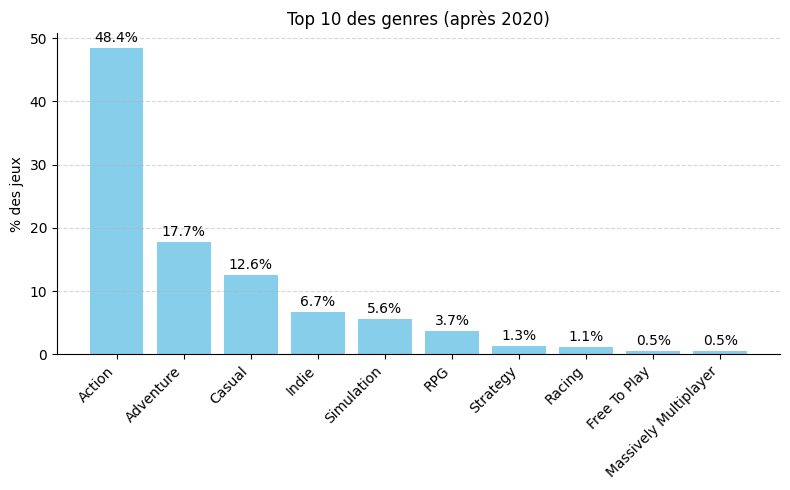


------------------------------------------------------------



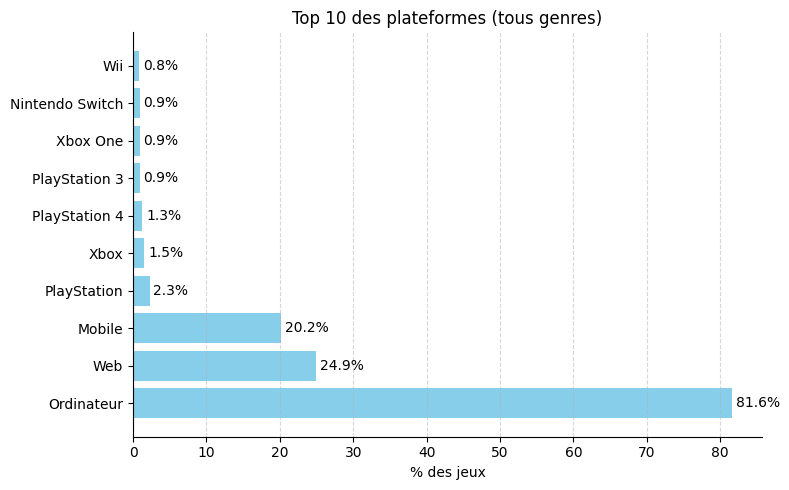


------------------------------------------------------------



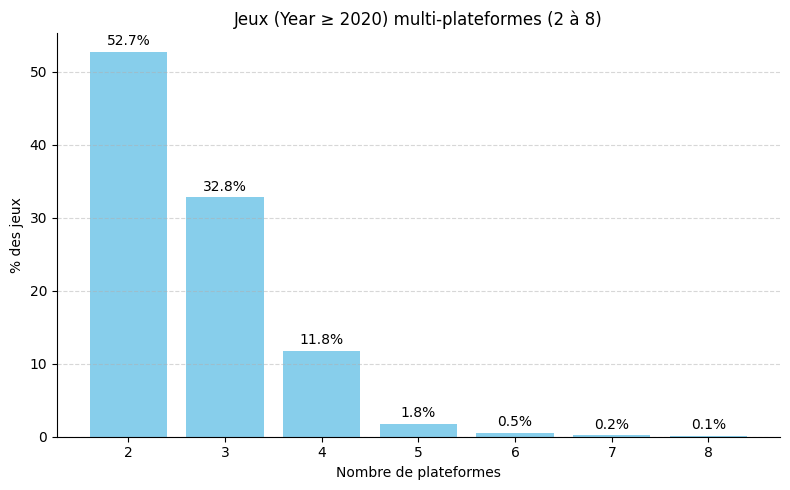


------------------------------------------------------------



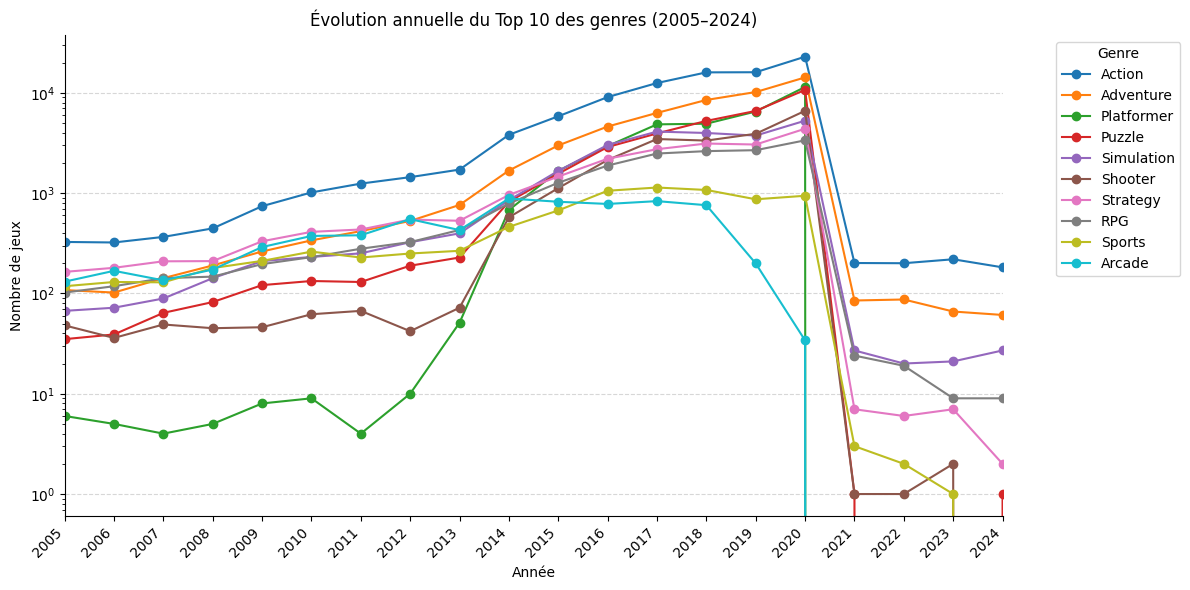


------------------------------------------------------------



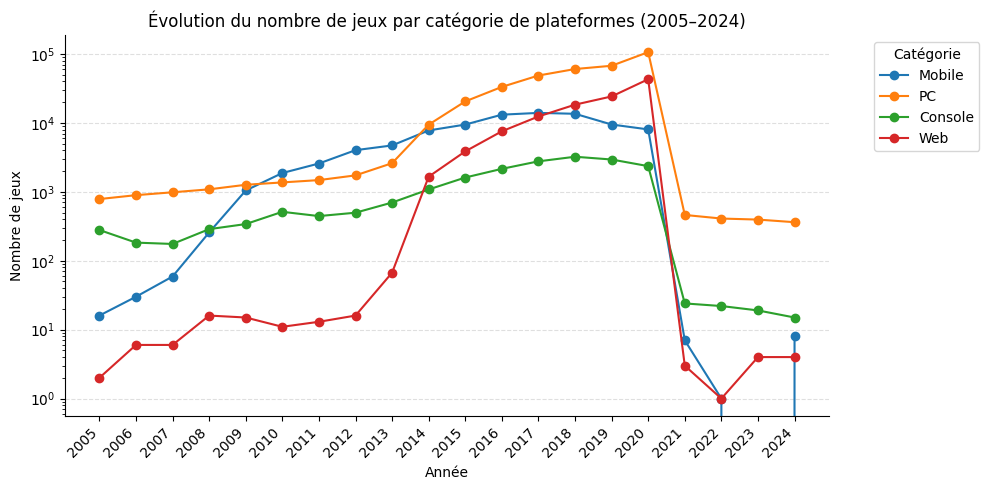

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- Chargement commun du CSV final ---

# Lire le CSV final avec encoding permissif et sep=","
df = pd.read_csv(
    'games_by_platform.csv',
    sep=',',
    encoding='latin-1',
    engine='python',
    dtype={'Year': 'Int64', 'Genre': str}
)


# --- Bloc 1 : Top 10 des genres après 2020 ---
df1 = df[(df['Year'] > 2020) & df['Genre'].ne('')]
top10 = df1['Genre'].value_counts(normalize=True).head(10) * 100

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(top10.index, top10, color='skyblue')
ax.set_title("Top 10 des genres (après 2020)")
ax.set_ylabel("% des jeux")
ax.set_xticklabels(top10.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h+0.5,
            f"{h:.1f}%", ha='center', va='bottom')
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

print("\n" + "-"*60 + "\n")


# --- Bloc 2 : Répartition des plateformes (tous genres) ---
# on regroupe iOS+Android → Mobile, PC+macOS+Linux → Ordinateur
mobile = ['iOS','Android']
desktop = ['PC','macOS','Linux']
plats = [c for c in df.columns if c not in ['Name','Year','Genre','Name_norm']]

s = df[plats].sum()
agg = {
    'Mobile': s.get('iOS',0)+s.get('Android',0),
    'Ordinateur': s.get('PC',0)+s.get('macOS',0)+s.get('Linux',0)
}
for p in plats:
    if p not in mobile+desktop:
        agg[p] = s.get(p,0)

total = len(df)
pct_plats = pd.Series(agg) / total * 100
pct_plats = pct_plats.sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.barh(pct_plats.index, pct_plats, color='skyblue')
ax.set_title("Top 10 des plateformes (tous genres)")
ax.set_xlabel("% des jeux")
ax.grid(axis='x', linestyle='--', alpha=0.5)
for bar in bars:
    w = bar.get_width()
    ax.text(w+0.5, bar.get_y()+bar.get_height()/2,
            f"{w:.1f}%", va='center')
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

print("\n" + "-"*60 + "\n")


# --- Bloc 3 : Multi-plateformes (2 à 8) sur jeux ≥2020 ---
df2 = df[df['Year'] >= 2020].copy()
plats2 = [c for c in df2.columns if c not in ['Name','Year','Genre','Name_norm']]
df2['n_platforms'] = df2[plats2].sum(axis=1)

sub = df2[(df2['n_platforms'] >= 2) & (df2['n_platforms'] <= 8)]
cnt = sub['n_platforms'].value_counts().sort_index()
pct = (cnt / len(sub) * 100).round(1)

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(pct.index.astype(str), pct.values, color='skyblue')
ax.set_title("Jeux (Year ≥ 2020) multi-plateformes (2 à 8)")
ax.set_xlabel("Nombre de plateformes")
ax.set_ylabel("% des jeux")
ax.grid(axis='y', linestyle='--', alpha=0.5)
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2, h+0.5,
            f"{h:.1f}%", ha='center', va='bottom')
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

print("\n" + "-"*60 + "\n")


# --- Bloc 4 : Évolution annuelle du Top 10 genres (2005–2024) ---
df3 = df[df['Genre'].ne('')].copy()
top10_list = (
    df3[df3['Year'] > 2005]['Genre']
       .value_counts()
       .head(10)
       .index
       .tolist()
)
pivot = df3.pivot_table(
    index='Year',
    columns='Genre',
    values='Name',
    aggfunc='count',
    fill_value=0
)[top10_list]

# masquer les années hors 2005–2024
mask = (pivot.index >= 2005) & (pivot.index <= 2024)
pivot = pivot.loc[mask]

fig, ax = plt.subplots(figsize=(12,6))
for genre in top10_list:
    ax.plot(pivot.index, pivot[genre], marker='o', label=genre)

ax.set_xlim(2005, 2024)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.set_yscale('log')

ax.set_title("Évolution annuelle du Top 10 des genres (2005–2024)")
ax.set_xlabel("Année")
ax.set_ylabel("Nombre de jeux")
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(title="Genre", bbox_to_anchor=(1.05,1), loc='upper left')
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n" + "-"*60 + "\n")

# --- Bloc 5 modifié : évolution par catégorie de plateformes ---
# 1) Détecter dynamiquement les colonnes plateformes
exclude = {'Name','Year','Genre','Name_norm'}
platform_cols = [c for c in df.columns if c not in exclude]

# 2) Calculer le nombre de jeux par année et par plateforme brute
df_year_plat = df.groupby('Year')[platform_cols].sum()

# 3) Restreindre la plage 2005–2024
df_year_plat = df_year_plat.loc[(df_year_plat.index >= 2005) & (df_year_plat.index <= 2024)]

# 4) Définir les groupes de plateformes
group_map = {
    'Mobile':     ['iOS','Android'],
    'PC':         ['PC','macOS','Linux'],
    'Console':    ['Xbox One','Xbox','Xbox Series S/X','PlayStation 5','Nintendo Switch','PlayStation 4'],
    'Web':        ['Web']
}

# 5) Agréger par groupe
df_cat = pd.DataFrame(index=df_year_plat.index)
for cat, cols in group_map.items():
    # ne garder que les colonnes existantes puis sommer
    valid = [c for c in cols if c in df_year_plat.columns]
    df_cat[cat] = df_year_plat[valid].sum(axis=1)

# 6) Tracer
fig, ax = plt.subplots(figsize=(10,5))
for cat in df_cat.columns:
    ax.plot(
        df_cat.index,
        df_cat[cat],
        marker='o',
        label=cat
    )

ax.set_title("Évolution du nombre de jeux par catégorie de plateformes (2005–2024)")
ax.set_xlabel("Année")
ax.set_ylabel("Nombre de jeux")
ax.set_yscale('log')  # log pour bien voir toutes les séries
ax.legend(title="Catégorie", bbox_to_anchor=(1.05,1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.4)

# épurer le style
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

# ticks annuels
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




Allons plus loin et faisons quelques test de correlation:


##   Corrélations temporelles : volumes de sorties par genre (2005–2020)

Test de Pearson



Corrélation temporelle par genre (Top 10 depuis 2020)

Ce bloc calcule la **corrélation linéaire de Pearson** entre l’année de sortie et le volume de jeux publiés (log-transformé) pour les 10 genres les plus représentés **depuis 2020**.

---

Étapes détaillées

1. Chargement et nettoyage des données
- Lecture du fichier `games_by_platform.csv`
- Conversion de la colonne `Year` en entier
- Suppression des lignes sans genre (`Genre = NaN` ou vide)

2. Détection des 10 genres dominants post-2020
- Le top 10 est basé sur les genres **les plus fréquemment publiés depuis 2020**

3. Création de la table `pivot` : **Nombre de jeux par année et par genre**
- Table `Year × Genre`
- Remplissage des valeurs nulles avec 0
- Restriction aux **10 genres les plus populaires** identifiés

4. Transformation logarithmique
- On applique `log1p(x) = log(1 + x)` pour :
  - Réduire l’impact des valeurs extrêmes
  - Linéariser la distribution des comptes de jeux (nécessaire pour la corrélation de Pearson)

---

Calcul des corrélations

- Pour chaque genre du top 10, on calcule :
  - **r** = coefficient de corrélation de Pearson (entre l’année et la fréquence des jeux)
  - **p-value** = probabilité que cette corrélation soit due au hasard

> **Formule de Pearson :**  
> r = cov(X, Y) / (σₓ * σᵧ)

---

Objectifs de cette analyse

- Identifier les **genres en croissance** (r > 0) ou **en déclin** (r < 0)
- Évaluer la **significativité statistique** de ces tendances (via `p-value`)
- Aider à anticiper les dynamiques de marché selon le **cycle de vie des genres**

---

Interprétation possible

| r (corrélation) | Signification |
|-----------------|----------------|
| r > 0.6          | Forte croissance temporelle |
| 0.3 < r < 0.6    | Tendance modérément croissante |
| −0.3 < r < 0.3   | Peu ou pas de tendance |
| r < −0.3         | Tendance à la baisse |

> Une **p-value < 0.05** indique une corrélation **statistiquement significative**.

---

Extensions possibles

- Visualiser les courbes log1p par genre
- Appliquer une **régression linéaire par genre**
- Analyser le **point de retournement** de certains genres (ex: pic de popularité suivi d’un déclin)



In [ ]:
import numpy as np
from scipy.stats import pearsonr

df = pd.read_csv(
    'games_by_platform.csv',
    sep=',',
    encoding='latin-1',
    engine='python',
    dtype={'Year': 'Int64', 'Genre': str}
)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
df2 = df[df['Genre'].notna() & (df['Genre']!='')].copy()

# reconstruire top10 si vous ne l'avez pas en mémoire
df20 = df2[df2['Year'] > 2020]
top10 = df20['Genre'].value_counts().head(10).index.tolist()


# Construire la table Year × Genre
pivot = df2.pivot_table(
    index='Year',
    columns='Genre',
    values='Name',
    aggfunc='count',
    fill_value=0
).sort_index()

# ne garder que les colonnes du Top10
pivot_top10 = pivot[top10]

# log1p pour linéariser (évite log(0))
log_counts = np.log1p(pivot_top10)

print("Genre   r       p-value")
print("-"*30)
for genre in top10:
    # Pearson entre l'année (float) et la série log-transformée
    r, p = pearsonr(log_counts.index.astype(float), log_counts[genre].values)
    print(f"{genre:<12} {r: .2f}    {p:.2e}")



Genre   r       p-value
------------------------------
Action        0.83    9.03e-14
Adventure     0.84    2.89e-14
Casual        0.84    2.76e-14
Indie         0.78    1.62e-11
Simulation    0.80    4.55e-12
RPG           0.78    3.75e-11
Strategy      0.71    6.05e-09
Racing        0.70    2.10e-08
Free To Play  0.57    1.28e-05
Massively Multiplayer  0.73    1.82e-09



Adventure, Casual et Action sont les genres dont l’offre s’est développée le plus vite depuis 2005.

Free To Play, bien que croissant, reste plus modéré, ce qui peut indiquer un marché plus saturé ou des cycles d’adoption différents.

Le Top 10 montre une croissance exponentielle très significative, ce qui confirme la montée en puissance continue du game publishing.

## Projection 2026

Ce bloc vise à projeter le **nombre de jeux publiés en 2026** selon les **10 genres les plus populaires entre 2005 et 2020**, en s'appuyant sur le fichier `games_by_platform.csv`.

---

Étapes de l’analyse

1. Nettoyage et préparation des données
- Chargement du fichier CSV
- Conversion des années au format numérique
- Sélection de la période de calibration : **2005 à 2020**
- Filtrage des genres : moyenne **> 5 jeux/an**

2. Modélisation statistique
Trois approches sont calculées :
- **Régression linéaire** : tendance stable sur la période
- **Régression polynomiale de degré 2** : permet de capturer des retournements de tendance
- **Projection depuis 2024** : si des données récentes sont disponibles

3. Fusion des projections
Les trois résultats sont comparés, puis une logique **semi-manuelle** est appliquée :

| Genre             | Projection retenue     |
|------------------|------------------------|
| Action-Adventure | Linéaire               |
| Arcade           | Polynômiale            |
| Board Games      | Polynômiale            |
| Card             | Polynômiale            |
| Casual           | Depuis 2024            |
| Family           | Depuis 2024            |
| Autres           | Depuis 2024 *(par défaut)* |

> Cette logique permet de **corriger les excès** (notamment des projections polynomiales parfois irréalistes), en s’appuyant sur une compréhension **métier** du marché.

---

Visualisation

- **Courbes log1p** des volumes historiques par genre
- **Point de projection finale (X)** positionné en 2026
- **Bar chart final** synthétisant la projection retenue par genre

---

Objectifs

- Identifier les **genres en croissance ou en reprise**
- Anticiper les **genres en déclin**
- Soutenir la **stratégie éditoriale ou de développement** de nouveaux titres

---

⚠️ Limites à garder en tête

- Les modèles reposent uniquement sur l’historique de publication
- Aucun facteur exogène n’est inclus (nouvelle console, changement de plateforme, saturation)
- L’approche **n’est pas prédictive absolue**, mais bien un **outil d’aide à la décision**

---

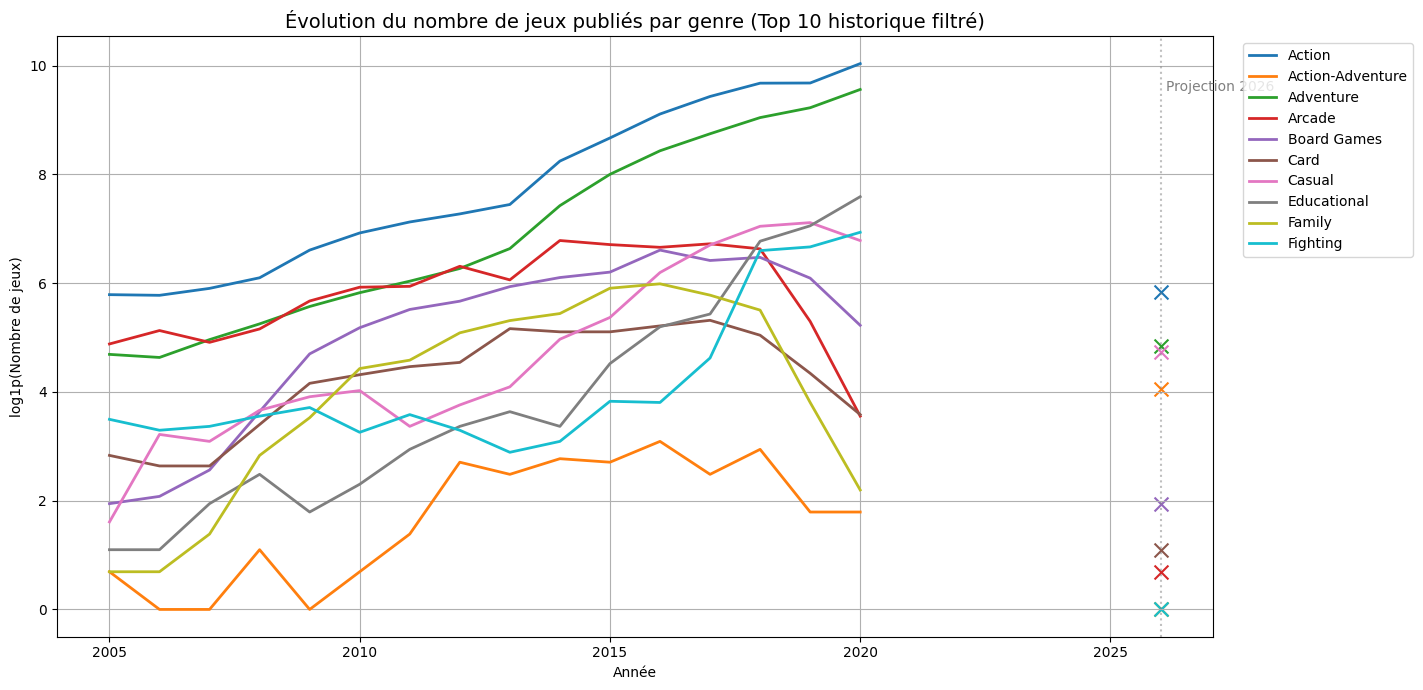

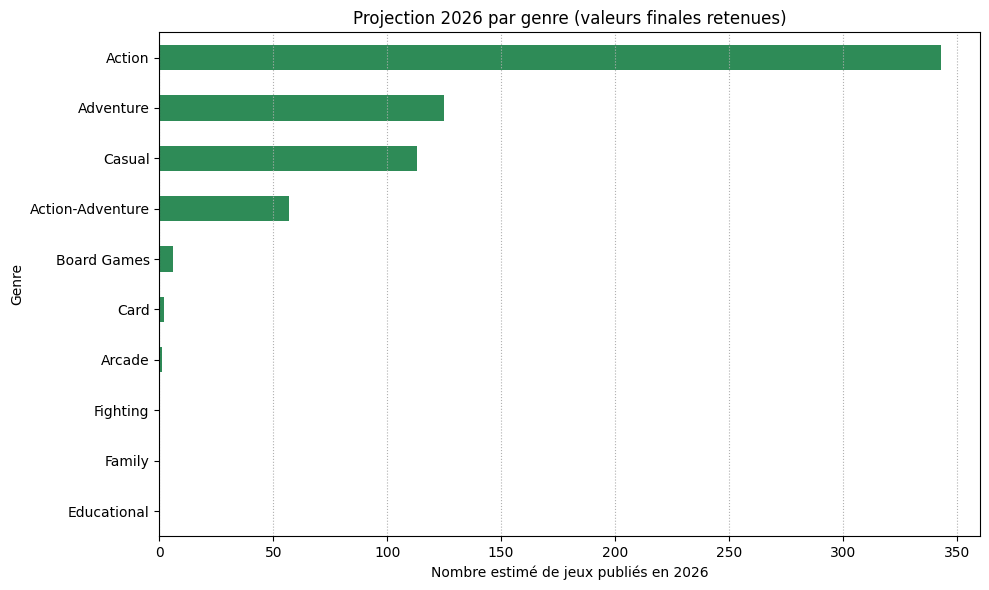

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# --- 1) Chargement ---
df = pd.read_csv('games_by_platform.csv', sep=',', encoding='ISO-8859-1', engine='python')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)

# --- 2) Calibration sur 2005–2020 ---
df_calib = df[df['Year'].between(2005, 2020)]

# --- 3) Pivot Year × Genre ---
pivot_calib = df_calib.pivot_table(index='Year', columns='Genre', values='Name', aggfunc='count', fill_value=0)

# --- 4) Filtrage des genres trop rares (volume moyen > 5/an) ---
valid_genres = pivot_calib.columns[pivot_calib.mean() > 5]
pivot_filtré = pivot_calib[valid_genres]

# --- 5) Top10 historique sur 2005–2020 ---
top10 = df_calib['Genre'].value_counts().loc[valid_genres].head(10).index.tolist()
pivot_top10 = pivot_filtré[top10]

# --- 6) log1p transform ---
log_counts = np.log1p(pivot_top10)
years = log_counts.index.values
x0 = years[0]
x = years - x0

# --- 7) Régression polynomiale de degré 2 ---
results_poly = []
proj_year = 2026 - x0
for genre in top10:
    y = log_counts[genre].values
    coeffs = np.polyfit(x, y, deg=2)
    y_proj = np.polyval(coeffs, proj_year)
    r2 = 1 - np.sum((y - np.polyval(coeffs, x))**2) / np.sum((y - np.mean(y))**2)
    results_poly.append({
        'Genre': genre,
        'a': coeffs[0],
        'b': coeffs[1],
        'c': coeffs[2],
        'r²': round(r2, 4),
        'est_2026_log_poly': y_proj,
        'est_2026_count_poly': int(round(np.expm1(y_proj)))
    })
df_poly = pd.DataFrame(results_poly).set_index('Genre')

# --- 8) Régression linéaire ---
results_lin = []
for genre in top10:
    y = log_counts[genre].values
    slope, intercept, r_val, _, _ = linregress(x, y)
    y_proj = intercept + slope * proj_year
    count_proj = np.expm1(y_proj)
    results_lin.append({
        'Genre': genre,
        'slope': slope,
        'intercept': intercept,
        'r²': r_val**2,
        'est_2026_log': y_proj,
        'est_2026_count': int(round(count_proj))
    })
df_trends = pd.DataFrame(results_lin).set_index('Genre')

# --- 9) Ajout estimation depuis 2024
pivot_full = df.pivot_table(index='Year', columns='Genre', values='Name', aggfunc='count', fill_value=0)
year_base = 2024
if year_base in pivot_full.index:
    count_base = pivot_full.loc[year_base][top10]
    years_delta = 2026 - year_base
    df_trends['facteur_moyen'] = np.exp(df_trends['slope'])
    df_trends['est_2026_from_2024'] = (
        count_base.values * df_trends['facteur_moyen']**years_delta
    ).round().astype(int)
else:
    df_trends['est_2026_from_2024'] = np.nan

# --- 10) Fusion des projections
df_hybride = df_trends[['est_2026_from_2024']].copy()
df_hybride['est_2026_lin'] = df_trends['est_2026_count']
df_hybride['r2_lin'] = df_trends['r²']
df_hybride['est_2026_poly'] = df_poly['est_2026_count_poly']
df_hybride['r2_poly'] = df_poly['r²']

# --- 11) Règles de choix semi-manuelles ---
def choisir_projection_custom(row):
    genre = row.name
    if genre == 'Action-Adventure':
        return row['est_2026_lin']
    elif genre == 'Arcade':
        return row['est_2026_poly']
    elif genre == 'Board Games':
        return row['est_2026_poly']
    elif genre == 'Card':
        return row['est_2026_poly']
    elif genre == 'Family':
        return row['est_2026_from_2024']
    elif genre == 'Casual':
        return row['est_2026_from_2024']
    else:
        return row['est_2026_from_2024']

df_hybride['projection_finale'] = df_hybride.apply(choisir_projection_custom, axis=1)

# --- 12) Source retenue
def source_projection(row):
    if row['projection_finale'] == row['est_2026_lin']:
        return 'lin'
    elif row['projection_finale'] == row['est_2026_poly']:
        return 'poly'
    else:
        return 'from_2024'
df_hybride['source_retention'] = df_hybride.apply(source_projection, axis=1)

# --- 13) Courbe des tendances avec projection finale
plt.figure(figsize=(13, 7))
colors = plt.cm.tab10.colors
for i, genre in enumerate(top10):
    color = colors[i % len(colors)]
    y_vals = log_counts[genre]
    plt.plot(years, y_vals, label=genre, color=color, linewidth=2)
    plt.scatter([2026], [np.log1p(df_hybride.loc[genre, 'projection_finale'])], color=color, marker='x', s=100)
plt.axvline(x=2026, color='gray', linestyle=':', alpha=0.5)
plt.text(2026 + 0.1, plt.ylim()[1] - 1, 'Projection 2026', color='gray')
plt.title('Évolution du nombre de jeux publiés par genre (Top 10 historique filtré)', fontsize=14)
plt.xlabel('Année')
plt.ylabel('log1p(Nombre de jeux)')
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

# --- 14) Bar chart final : uniquement projection finale retenue ---
df_final = df_hybride[['projection_finale']].fillna(0).astype(int)
df_final = df_final.sort_values('projection_finale')

df_final.plot(kind='barh', figsize=(10, 6), legend=False, color='seagreen')
plt.title("Projection 2026 par genre (valeurs finales retenues)")
plt.xlabel("Nombre estimé de jeux publiés en 2026")
plt.grid(axis='x', linestyle=':')
plt.tight_layout()
plt.show()


Prioriser l’Action-Adventure, cœur de marché


*   Volumes : Action et Adventure représentent les plus gros segments, avec une croissance annuelle de +37 % et +43 % respectivement.
*   Fiabilité : très bon R² (> 0,97), ce qui signifie que cette tendance est robuste.
*   Conseil AAA : développez un titre hybride Action-Adventure haut de gamme, avec un univers riche et un gameplay équilibré entre combats (Action) et exploration/narration (Adventure).

## Relation entre Genre et Multi‐plateformité
Ce bloc d’analyse vise à vérifier s’il existe une **relation significative** entre le **genre d’un jeu** et son **statut mono-plateforme ou multi-plateforme**, à l’aide d’un **test du χ² (chi-deux) d’indépendance**.

---

Étapes de l’analyse

1. Chargement et préparation des données
- Chargement du fichier `games_by_platform.csv`
- Identification automatique des colonnes correspondant aux plateformes
- Calcul du nombre de plateformes pour chaque jeu (`n_platforms`)
- Création d’une variable binaire `is_multi` :
  - `0` = mono-plateforme
  - `1` = multi-plateforme (plus d’une plateforme)

2. Construction de la table de contingence
- Table croisée (`crosstab`) entre **Genre** et **is_multi**
- Cela permet d’observer la distribution des jeux mono vs multi pour chaque genre

3. Application du test χ² d’indépendance
- Le test du chi² vérifie si les deux variables sont **statistiquement indépendantes**
- Si la **p-value < 0.05**, alors il existe une **association significative** entre les deux variables

4. Interprétation du résultat
- **Si le test est significatif** : certains genres sont plus susceptibles d’être multi-plateformes que d'autres
- **Sinon** : aucune preuve d’une association structurelle entre genre et nombre de plateformes

---

Visualisation

Un graphique en barres empilées est généré pour visualiser la **répartition des jeux mono vs multi-plateformes par genre**.

- Les genres sont en abscisse
- Chaque barre est segmentée par statut (`mono` ou `multi`)
- Permet de **visualiser les déséquilibres éventuels** entre genres

---

Objectif de l’analyse

- Identifier si le **statut de distribution (mono/multi)** dépend du **type de jeu**
- Aider à anticiper les **choix de distribution** en fonction du genre
- Soutenir une **stratégie de développement cross-platform** ou non

---
⚠️ Limites

- Ne tient pas compte du **volume de ventes** ou de la **répartition par année**

📊 Table de contingence (extrait) :
is_multi              0      1
Genre                         
Action            71319  24624
Action-Adventure     78     54
Adventure         39999  12197
Arcade             6228   1471
Board Game            5      0 

📈 Top 5 des genres les plus multi-plateformes :
                   % multi
Genre                     
Sandbox           1.000000
Action-Adventure  0.409091
Music             0.298246
Action            0.256652
Indie             0.256350 

📉 Flop 5 des genres les moins multi-plateformes :
               % multi
Genre                 
Board Game    0.000000
Early Access  0.000000
Free To Play  0.050847
Family        0.066817
Party         0.076923 

📐 Test du χ² :
χ² = 1752.00, degrés de liberté = 30, p-value = 0.000e+00
📏 V de Cramer = 0.071

📊 Résidus standardisés (multi-plateforme = colonne 1) :
Genres les plus multi :
                  résidu multi
Genre                         
Sandbox               1.595847
Action-Adventure      4.2

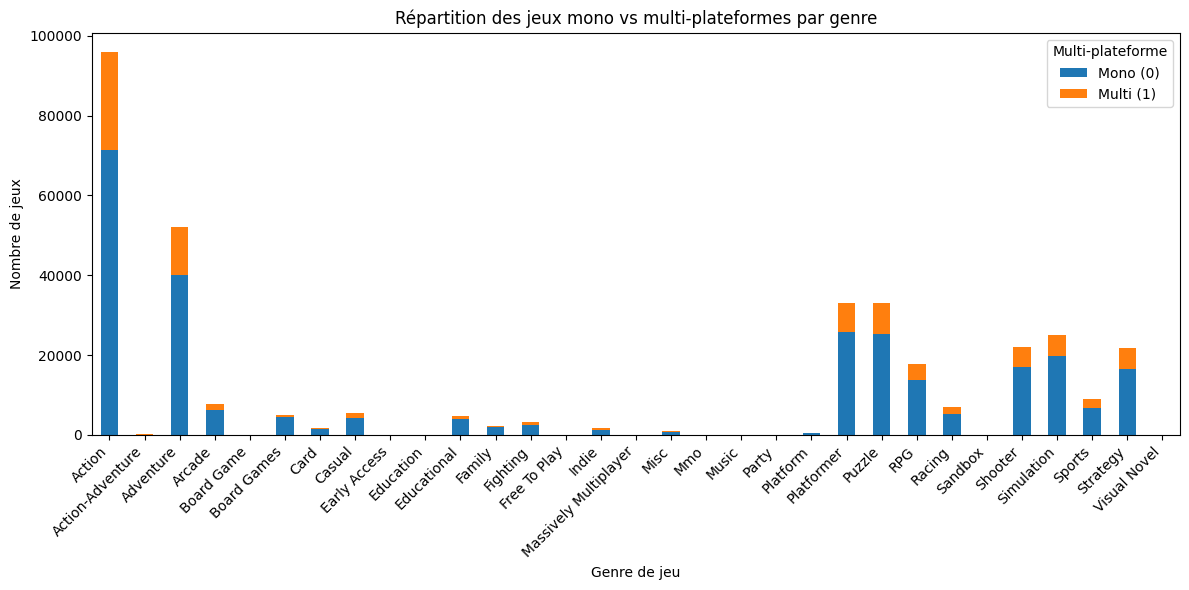

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# --- 1) Charger les données ---
df = pd.read_csv('games_by_platform.csv', sep=',', encoding='ISO-8859-1', engine='python')

# --- 2) Identifier les colonnes plateformes et créer is_multi ---
exclude = {'Name', 'Year', 'Genre', 'Name_norm'}
plat_cols = [c for c in df.columns if c not in exclude]
df['n_platforms'] = df[plat_cols].sum(axis=1)
df['is_multi'] = (df['n_platforms'] > 1).astype(int)

# --- 3) Table de contingence Genre × is_multi ---
ct = pd.crosstab(df['Genre'], df['is_multi'])
print("📊 Table de contingence (extrait) :")
print(ct.head(), "\n")

# --- 4) Proportion multi-plateformes par genre ---
prop = ct.div(ct.sum(axis=1), axis=0)[1].sort_values(ascending=False)
print("📈 Top 5 des genres les plus multi-plateformes :")
print(prop.head(5).to_frame(name='% multi'), "\n")
print("📉 Flop 5 des genres les moins multi-plateformes :")
print(prop.tail(5).to_frame(name='% multi')[::-1], "\n")

# --- 5) Test du chi² + V de Cramer ---
chi2, p, dof, expected = chi2_contingency(ct)
n = ct.sum().sum()
k = min(ct.shape)
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

print(f"📐 Test du χ² :")
print(f"χ² = {chi2:.2f}, degrés de liberté = {dof}, p-value = {p:.3e}")
print(f"📏 V de Cramer = {cramers_v:.3f}")

# --- 6) Résidus standardisés ---
resid = (ct - expected) / np.sqrt(expected)
resid_df = pd.DataFrame(resid, index=ct.index, columns=ct.columns)

# Affichage résidus des genres extrêmes
print("\n📊 Résidus standardisés (multi-plateforme = colonne 1) :")
print("Genres les plus multi :")
print(resid_df.loc[prop.head(5).index, 1].to_frame(name='résidu multi'))
print("\nGenres les moins multi :")
print(resid_df.loc[prop.tail(5).index, 1].to_frame(name='résidu multi'))

# --- 7) Interprétation automatique ---
print("\n📋 Interprétation :")
if p < 0.05:
    print("→ H₀ rejetée : il existe une association significative entre genre et statut multi-plateforme.")
    if cramers_v < 0.1:
        print("   ⚠️ Association très faible (V de Cramer < 0.1)")
    elif cramers_v < 0.3:
        print("   🟡 Association faible à modérée.")
    else:
        print("   ✅ Association forte.")
else:
    print("→ On ne peut pas rejeter l’hypothèse d’indépendance : pas de preuve solide de lien.")

# --- 8) Visualisation graphique ---
ax = ct.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Répartition des jeux mono vs multi-plateformes par genre")
plt.xlabel("Genre de jeu")
plt.ylabel("Nombre de jeux")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Multi-plateforme', labels=['Mono (0)', 'Multi (1)'])
plt.tight_layout()
plt.show()


Bien que la répartition entre jeux mono et multi-plateformes varie légèrement selon le genre (χ² significatif), la force de cette relation est très faible (V = 0.071).
Cela suggère que d'autres facteurs — comme le budget, la stratégie de distribution, ou la taille du studio — sont probablement plus déterminants que le genre pour expliquer la multi-plateformisation d’un jeu.

Pour un AAA à large audience, orientez-vous plutôt vers un Action-Adventure, et structurez votre chaîne de production pour déployer simultanément sur PC, Xbox, PlayStation (et éventuellement Switch/mobile). Cela correspond à la tendance la plus “multi-plateforme” et garantit le meilleur retour sur investissement.

# Analyse comparative des ventes consoles & jeux vidéo


Analyse des ventes de consoles actuelles en 2025

Ce graphique présente les **ventes totales de consoles actuelles** en 2025, à partir des données du fichier `Vente+de+console_2025.xlsx`.

---

Étapes du traitement

1. **Chargement des données**
   - Lecture d’un fichier Excel contenant les ventes par console.

2. **Filtrage ciblé**
   - Sélection uniquement des **consoles de génération actuelle** :
     - Nintendo **Switch**
     - Sony **PlayStation 5**
     - Microsoft **Xbox Series**

3. **Agréger les ventes**
   - Regroupement des ventes par console et **somme des volumes vendus**.

4. **Affichage graphique**
   - Création d’un **histogramme clair** comparant les ventes totales par console.
   - Les valeurs sont affichées **en millions d’unités vendues**, directement au-dessus de chaque barre.

---

Objectif du graphique

- Comparer la performance commerciale des consoles en 2025.
- Visualiser la **répartition des ventes** entre les trois principales plateformes.
- Soutenir une **analyse stratégique** des préférences des consommateurs selon les marques.

---

Notes techniques

- Les valeurs numériques sont affichées en **millions d’unités** (`1e6`).
- Le graphique est stylisé pour une meilleure lisibilité (grille légère, annotations au-dessus des barres).
- L’axe des abscisses utilise une rotation à `0°` pour une lecture plus directe des noms de consoles.

---



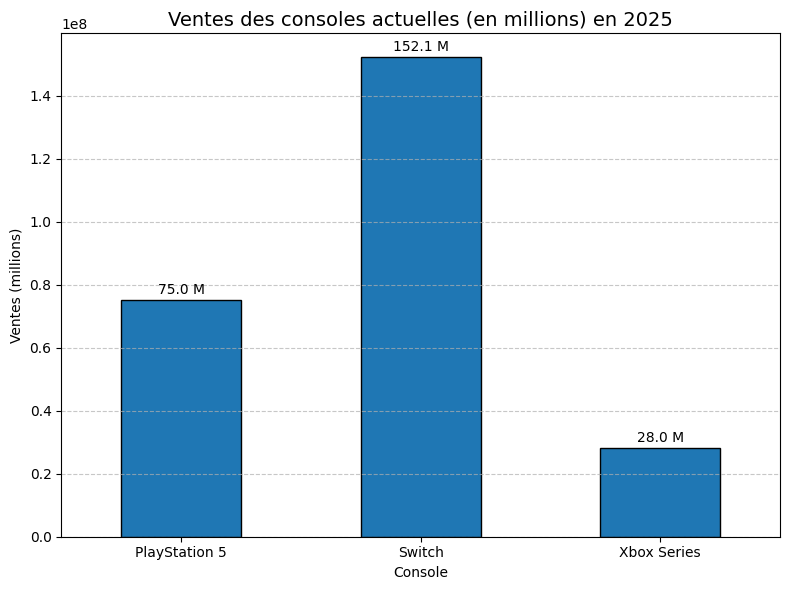

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
fichier = '/content/Vente+de+console_2025.xlsx'
df = pd.read_excel(fichier)

# Liste des consoles actuelles
consoles_actuelles = ['Switch', 'PlayStation 5', 'Xbox Series']

# Filtrer les données
df_consoles = df[df['Console'].isin(consoles_actuelles)]

# Agréger les ventes
ventes_par_console = df_consoles.groupby('Console')['Vente'].sum()

# Affichage de l'histogramme
plt.figure(figsize=(8,6))
ax = ventes_par_console.plot(kind='bar', edgecolor='black')

# Ajouter les étiquettes de valeurs
for i, v in enumerate(ventes_par_console):
    ax.text(i, v + 1e6, f'{v/1e6:.1f} M', ha='center', va='bottom', fontsize=10)

# Étiquettes horizontales
plt.xticks(rotation=0)

plt.title("Ventes des consoles actuelles (en millions) en 2025", fontsize=14)
plt.xlabel("Console")
plt.ylabel("Ventes (millions)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Évolution du chiffre d'affaires global par genre (Top 5) — courbes lissées

Ce graphique présente l'évolution du **chiffre d'affaires global** des 5 genres de jeux vidéo les plus vendeurs à travers le temps, à partir du fichier `BDD_jeux_video.xlsx`.

---

Étapes de traitement

1. Chargement et préparation des données
- Lecture d’un fichier Excel contenant les ventes globales (`Global_Sales`) par jeu.
- Agrégation des ventes par **année** et **genre**, afin d’obtenir une **série temporelle** du CA global.

2. Sélection des genres principaux
- On sélectionne les **5 genres les plus vendeurs** sur l'ensemble de la période.

3. Lissage par moyenne mobile (MM5)
- Pour atténuer la **volatilité interannuelle** (ex. sorties exceptionnelles), on applique une **moyenne mobile sur 5 ans**.
- Cela permet de mieux visualiser les **tendances de fond** plutôt que les fluctuations ponctuelles.

---

Visualisation du graphique

- Chaque courbe représente un genre, avec un style **pointillé** pour signaler qu’il s’agit d’une courbe **lissée**.
- L’axe des abscisses (temps) est affiché de façon lisible avec une **graduation tous les 5 ans**, et est limité à l’année **2024**.
- L’axe des ordonnées affiche le **CA en millions** (ex: 50 000 000 = 50 M).
- La **légende à droite** indique clairement les genres représentés.

---

Objectifs de l’analyse

- Identifier les **cycles de croissance et de déclin** des principaux genres.
- Fournir une base pour :
  - la **veille stratégique** du marché
  - le positionnement éditorial
  - les décisions d’investissement dans certains types de jeux

---

Remarque

Ce graphique ne montre que les **courbes lissées** (moyenne mobile) pour privilégier la clarté et la lisibilité, sans afficher les données annuelles brutes.



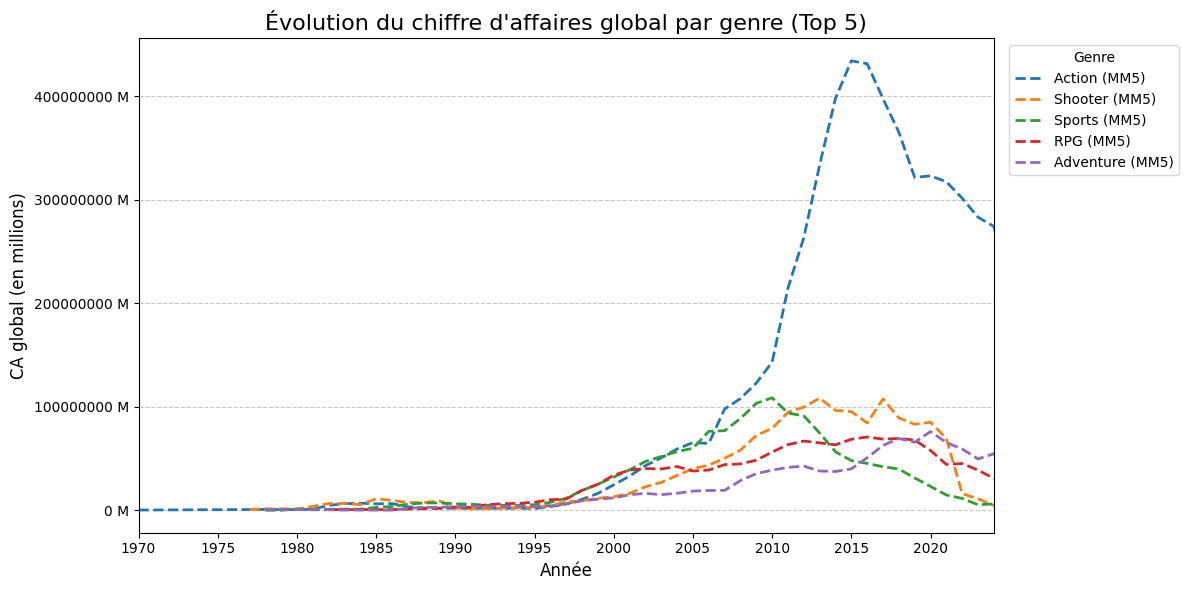

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

# --- 1. Chargement des données ---
df = pd.read_excel('/content/BDD_jeux_video.xlsx')

# --- 2. Agrégation par année et genre ---
# On suppose que les colonnes s'appellent : 'Year', 'Genre', 'Global_Sales'
evolution = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()

# --- 3. Sélection des 5 genres les plus vendeurs ---
top_genres = evolution.sum().sort_values(ascending=False).head(5).index
evolution = evolution[top_genres]

# Moyenne mobile sur 5 ans
window = 5
evolution_smooth = evolution.rolling(window=window, min_periods=1).mean()

# Tracé uniquement des courbes lissées
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10", len(evolution.columns))

for i, genre in enumerate(evolution.columns):
    plt.plot(
        evolution.index,
        evolution_smooth[genre],
        label=f'{genre} (MM{window})',
        color=palette[i],
        linestyle='--',
        linewidth=2
    )

plt.title("Évolution du chiffre d'affaires global par genre (Top 5)", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("CA global (en millions)", fontsize=12)
plt.xticks(ticks=np.arange(evolution.index.min(), evolution.index.max() + 1, 5), fontsize=10)
plt.xlim(evolution.index.min(), 2024)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Genre", fontsize=10, loc='upper left', bbox_to_anchor=(1.01, 1))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.0f} M'))
plt.tight_layout()
plt.show()



Analyse des préférences des joueurs de jeux vidéo (questionnaire)

Ce bloc exploite les réponses à un questionnaire visant à mieux comprendre les **habitudes, préférences et critères d’achat** des joueurs de jeux vidéo.

Le fichier utilisé est :  
`Étude sur les préférences des joueurs de jeux vidéo (réponses).xlsx`

---

Étapes de l’analyse

Préparation des données
- Renommage des colonnes pour plus de clarté (`Age`, `Plateforme`, `Genre`, etc.)
- Nettoyage des réponses multiples (ex. plateformes, genres ou critères séparés par des virgules)

---

Analyses et graphiques

1. Répartition des joueurs par **tranche d'âge**
- Histogramme horizontal (en %)
- Permet d’identifier le **cœur démographique** des répondants

2. Plateformes les plus utilisées
- Traitement des réponses multiples (ex : "PC, PS5")
- Classement des plateformes par **fréquence d'utilisation**
- Permet de connaître les supports préférés des joueurs

3. Genres de jeux préférés
- Regroupe les préférences exprimées (souvent multiples)
- Met en évidence les **genres dominants dans les usages**

4. Critères d’achat les plus importants
- Extraction des critères jugés prioritaires par les répondants (ex : durée de vie, prix, scénario, etc.)
- Aide à identifier les **leviers de conversion les plus sensibles**

5. Acceptation du prix de 70 € pour un jeu AAA (par tranche d'âge)
- Les réponses ont été **regroupées en grandes catégories** :
  - Refus
  - Histoire originale
  - Bonne évaluation
  - Suite/DLC prévu
  - Studio reconnu
- Le graphique 100 % empilé par âge permet de voir comment la **tolérance au prix varie selon la génération**.

---

Objectifs de l’analyse

- Mieux comprendre les **profils d’acheteurs** selon l’âge
- Identifier les **plateformes et genres dominants**
- Repérer les **facteurs d’achat clés**
- Aider à positionner un **produit ou une campagne marketing** sur les bons critères

---

Remarques techniques

- Les valeurs sont systématiquement **affichées en pourcentage**, par souci de lisibilité
- Les réponses multiples sont **splittées proprement** à l’aide de `str.split(',')` + `chain.from_iterable`
- Le traitement du prix à 70 € utilise une **fonction de regroupement textuelle intelligente**

---



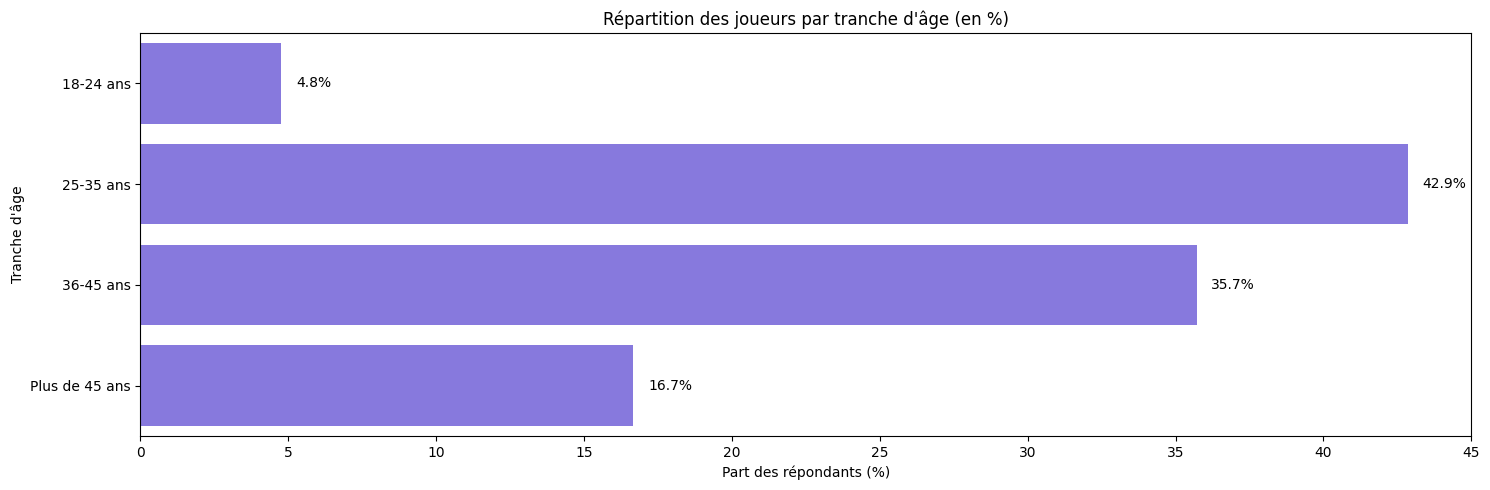

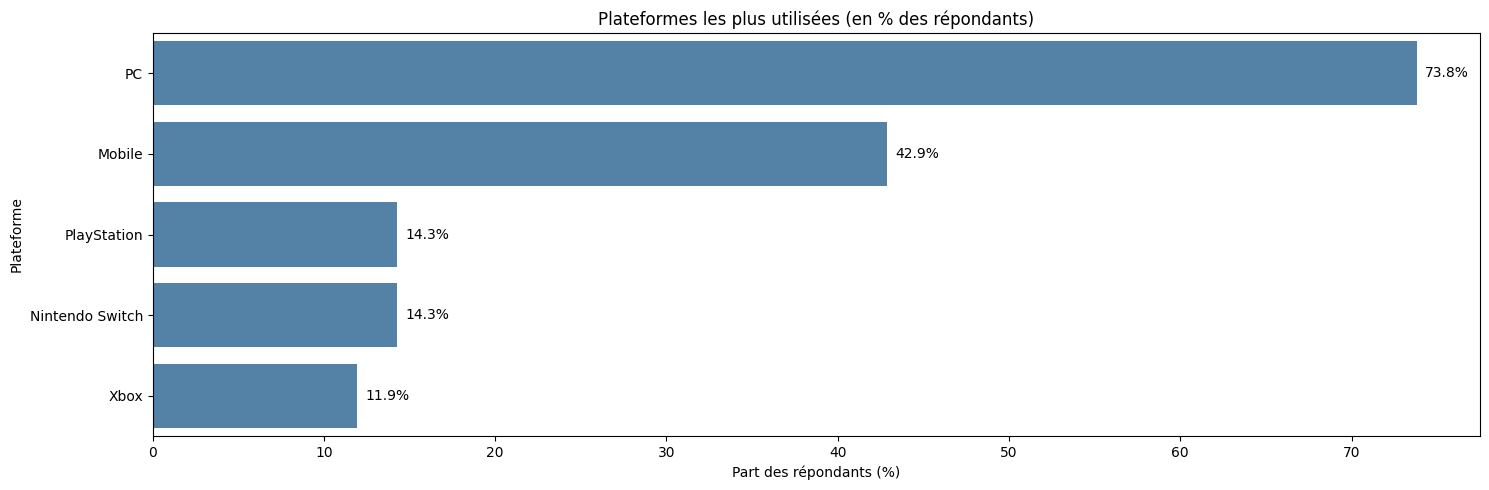

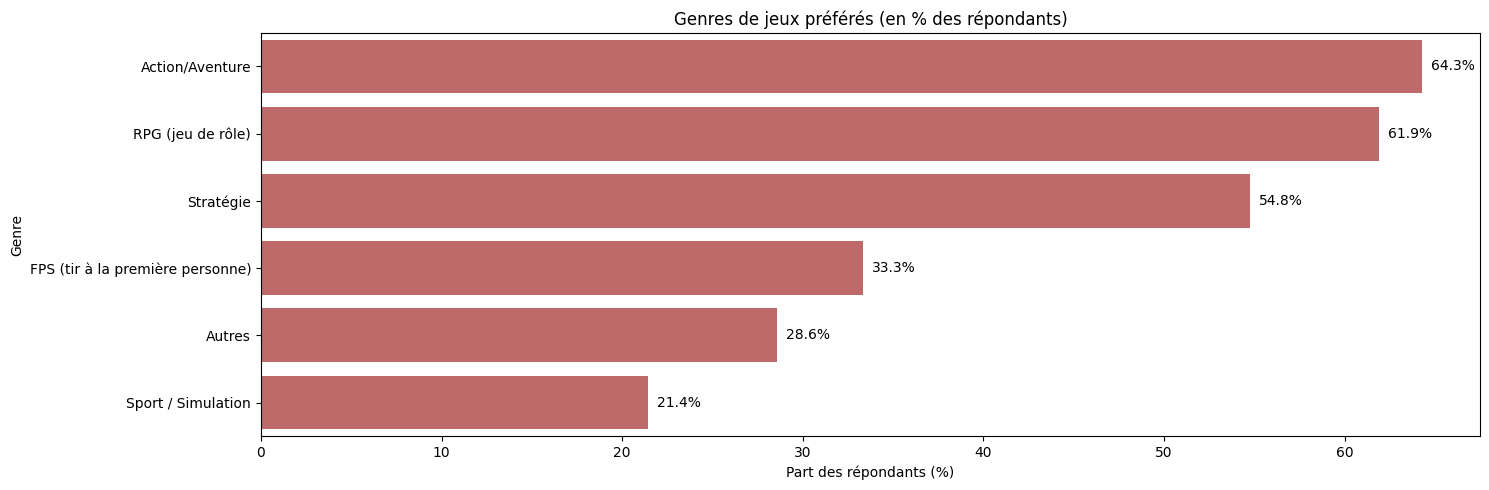

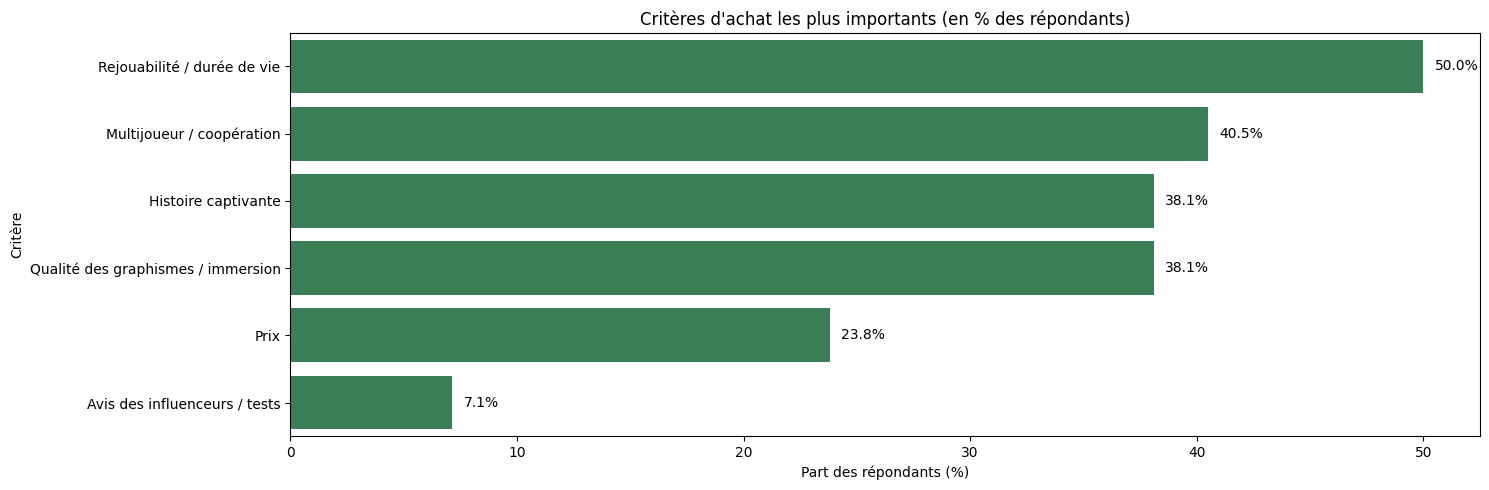

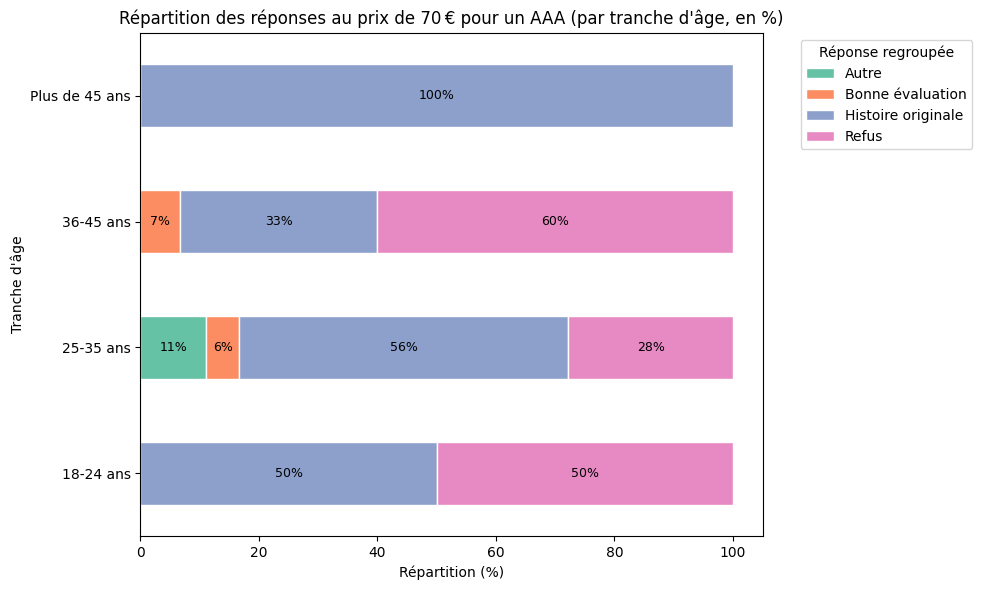

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain

# Chargement du fichier nettoyé
fichier = "/content/Étude sur les préférences des joueurs de jeux vidéo (réponses).xlsx"
df = pd.read_excel(fichier)

# Renommage des colonnes
df.columns = df.columns.str.strip()
df = df.rename(columns={
    "Quel âge avez-vous ?": "Age",
    "Sur quelle(s) plateforme(s) jouez-vous le plus souvent ?": "Plateforme",
    "Quel genre de jeu préférez-vous ?": "Genre",
    "Lorsque vous achetez un jeu, quel(s) critère(s) sont les plus importants ?": "Critere_achat",
    "Seriez-vous prêt à acheter un jeu AAA à 70 € si :": "AAA_70euros"
})

# Total de répondants
total_repondants = len(df)

# ------ 1. Répartition des âges (en %) ------
age_pct = df["Age"].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(15,5))
ax = sns.barplot(x=age_pct.values, y=age_pct.index, color="mediumslateblue")
for i, v in enumerate(age_pct.values):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.title("Répartition des joueurs par tranche d'âge (en %)")
plt.xlabel("Part des répondants (%)")
plt.ylabel("Tranche d'âge")
plt.tight_layout()
plt.show()

# ------ 2. Plateformes les plus utilisées (en %) ------
platformes_explosees = df['Plateforme'].dropna().str.split(',').apply(lambda x: [i.strip() for i in x])
flat_platforms = list(chain.from_iterable(platformes_explosees))
count_platforms = pd.Series(Counter(flat_platforms))
pct_platforms = (count_platforms / total_repondants * 100).sort_values(ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(x=pct_platforms.values, y=pct_platforms.index, color="steelblue")
for i, v in enumerate(pct_platforms.values):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.title("Plateformes les plus utilisées (en % des répondants)")
plt.xlabel("Part des répondants (%)")
plt.ylabel("Plateforme")
plt.tight_layout()
plt.show()

# ------ 3. Genres préférés (en %) ------
genres_exploses = df['Genre'].dropna().str.split(',').apply(lambda x: [i.strip() for i in x])
flat_genres = list(chain.from_iterable(genres_exploses))
count_genres = pd.Series(Counter(flat_genres))
pct_genres = (count_genres / total_repondants * 100).sort_values(ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(x=pct_genres.values, y=pct_genres.index, color="indianred")
for i, v in enumerate(pct_genres.values):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.title("Genres de jeux préférés (en % des répondants)")
plt.xlabel("Part des répondants (%)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# ------ 4. Critères d'achat (en %) ------
criteres_exploses = df['Critere_achat'].dropna().str.split(',').apply(lambda x: [i.strip() for i in x])
flat_criteres = list(chain.from_iterable(criteres_exploses))
count_criteres = pd.Series(Counter(flat_criteres))
pct_criteres = (count_criteres / total_repondants * 100).sort_values(ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(x=pct_criteres.values, y=pct_criteres.index, color="seagreen")
for i, v in enumerate(pct_criteres.values):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.title("Critères d'achat les plus importants (en % des répondants)")
plt.xlabel("Part des répondants (%)")
plt.ylabel("Critère")
plt.tight_layout()
plt.show()

# ------ 5. Répartition des réponses au prix de 70 € pour un AAA (par tranche d'âge, en %) ------

# Regrouper les réponses au prix de 70 €
def regrouper_reponses(texte):
    if pd.isna(texte):
        return "Non précisé"
    texte = texte.lower()
    if "jamais ce prix" in texte:
        return "Refus"
    elif "histoire originale" in texte:
        return "Histoire originale"
    elif "bien noté" in texte:
        return "Bonne évaluation"
    elif "suite ou contenu" in texte:
        return "Suite ou DLC prévu"
    elif "studio reconnu" in texte:
        return "Studio reconnu"
    else:
        return "Autre"

# Application du regroupement
df["Réponse_simplifiée"] = df["AAA_70euros"].apply(regrouper_reponses)

# Recalcul du tableau croisé
df_pct = df.groupby(["Age", "Réponse_simplifiée"]).size().unstack().fillna(0)

# Convertir en % par ligne (tranche d’âge)
df_pct_percent = df_pct.div(df_pct.sum(axis=1), axis=0) * 100

# Tracé du graphique 100% empilé
colors = plt.cm.Set2.colors
ax = df_pct_percent.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors, edgecolor="white")

# Ajouter les % dans les barres
for i, (index, row) in enumerate(df_pct_percent.iterrows()):
    cum_width = 0
    for j, (col, val) in enumerate(row.items()):
        if val > 3:
            ax.text(cum_width + val / 2, i, f"{val:.0f}%", va="center", ha="center", fontsize=9, color="black")
        cum_width += val

plt.title("Répartition des réponses au prix de 70 € pour un AAA (par tranche d'âge, en %)")
plt.xlabel("Répartition (%)")
plt.ylabel("Tranche d'âge")
plt.legend(title="Réponse regroupée", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Recommandations stratégiques pour le développement d’un jeu AAA

---

## 1. Type de jeu recommandé

** Jeu AAA narratif, Action-Aventure avec composantes RPG**

- Genres à forte croissance annuelle :
  - Action : +37 %
  - Aventure : +43 %  

- Préféré par **64 %** des joueurs interrogés  
- Exemples à succès récents : *Final Fantasy VII Rebirth*, *Stellar Blade*, *Zelda: Echoes of Wisdom*, *Dragon Age: The Veilguard*

> **Genre cible** = Narration forte + Immersion + Exploration

💡 Dans un contexte de consolidation du temps de jeu et de hausse des coûts de production, un AAA à forte identité narrative, calibré pour 15–30h de contenu principal, permet un meilleur ROI qu’un open world de 80h non terminé par la majorité des joueurs.  
*(Source : Newzoo Trend #2)*

Les genres Adventure, RPG et Shooter figurent dans le top 5 des revenus PC/Console en 2024  
*(Source : Newzoo 2024)*

---

## 2. Marché cible

** Public prioritaire : adultes 25–45 ans**

- Représentent **78 %** des acheteurs premium (pouvoir d’achat élevé)
- Attentes clés : rejouabilité, narration, coopération facultative  
  *(Source : Newzoo 2024)*

** Second public stratégique : Gen Z & Alpha (10–25 ans)**  
- Respectivement 94 % et 86 % de taux de jeu chez les connectés  
- Forte appétence pour les jeux communautaires & narratifs

💡 Cibler les **Highly Engaged Players** (joueurs >10h/semaine) pour maximiser la conversion en payers et la LTV  
*(Source : Newzoo – Global Gamer Study)*

---

## 3. Plateformes recommandées

** Déploiement cross-gen :**  
**PC + PS5 + Xbox Series + Switch 2**

- Le PC est le grand gagnant des sorties multiplateformes (+4,0 % croissance)
- Switch = 152M de consoles vendues (plus grand parc installé)
- PS5 > Xbox Series, mais cross-gen indispensable

**⚠️ À éviter :** sortie native sur mobile → privilégier :
- Le **cloud gaming**
- Ou une **application compagnon** (inventaire, carte, suivi social)  
*(Source : SELL 2024 + Newzoo Trend #3)*

---

## 4. Modèle économique conseillé

** Hybride Premium + Live-Service (GaaS)**

- Prix initial : **70 €**
- Monétisation éthique et durable via :
  - Season Pass / DLC narratifs
  - Contenu épisodique (live ops)
  - Coopératif optionnel

> 💡 LTV maximale = Premium + GaaS bien calibré

💡 Lancement en **Early Access sur Steam** pour valider l’intérêt communautaire, ajuster les features, et créer une base d’ambassadeurs engagés  
*(Source : Newzoo Trend #4 + GDC 2024)*

**Stratégie de discount recommandée** :
- -10 % à la sortie pour favoriser les conversions de wishlist
- -20 à -30 % après 6–9 mois
- Bundles narratifs à 1 an pour prolonger la durée de vie  
*(Source : Newzoo Focus #2 – Steam Discount Management)*

---

## 5. Écosystème & stratégie transmédia

- Créer une **licence originale** avec potentiel de :
  - Adaptation série (Netflix, Amazon)
  - Produits dérivés (BD, roman)
- Renforcer la viralité avec :
  - Partenariats Twitch/YouTube
  - Bêta publique + campagnes UGC (user-generated content)

💡 Les jeunes générations (Gen Z & Alpha) interagissent avec les jeux au-delà du gameplay : en les regardant, en les commentant, en créant des contenus.  
*(Source : Newzoo Trend #8 – UGC & nouvelles générations)*

---

## Synthèse tabulaire

| Élément            | Recommandation                                                  |
|--------------------|------------------------------------------------------------------|
| **Genre**          | AAA narratif Action-Aventure avec composantes RPG              |
| **Public cible**   | 25–45 ans (premium), 10–25 ans (communautaires)                |
| **Plateformes**    | PC, PS5, Xbox Series, Switch 2 (cross-gen)                     |
| **Modèle éco.**    | Premium + DLC + live-service + early access                    |
| **Différenciation**| Univers narratif original, potentiel transmédia, coopératif    |


---

## Exemples inspirants

### *Baldur’s Gate 3* (Larian Studios, 2023)

| Élément       | Présence                          |
|---------------|-----------------------------------|
| Genre         | RPG narratif                      |
| Plateformes   | PC, PS5, Xbox Series              |
| Modèle éco.   | Premium (70 €), sans microtransactions |
| Particularité | Early Access dès 2020, coopératif |

> **💡 Pourquoi c’est pertinent ?**  
> Narration exceptionnelle, forte rejouabilité, stratégie communautaire gagnante.

---

### *Star Wars Outlaws* (Ubisoft, 2024)

| Élément       | Présence                           |
|---------------|------------------------------------|
| Genre         | Action-Aventure narratif           |
| Plateformes   | PC, PS5, Xbox Series               |
| Modèle éco.   | Premium (potentiel GaaS)           |
| Particularité | Fort ancrage transmedia (licence)  |

> **💡 Pourquoi c’est pertinent ?**  
> Univers connu, solo immersif, marketing transmedia renforcé.

---

### *Hogwarts Legacy* (Warner Bros, 2023)

| Élément       | Présence                            |
|---------------|-------------------------------------|
| Genre         | Action-Aventure RPG                 |
| Plateformes   | PC, PS5, Xbox Series, Switch        |
| Modèle éco.   | Premium + DLC narratif              |
| Particularité | 15M ventes, immersion forte, contenu étendu |

> **💡 Pourquoi c’est pertinent ?**  
> Repose sur un univers fort, succès commercial massif, modèle éthique et scalable.

---

## ✅ Conclusion

Les titres récents confirment que :

- Un **AAA narratif, cross-plateforme** avec contenu additionnel bien dosé **répond aux attentes du marché**
- L’**Early Access** est une tactique puissante pour créer un jeu **communautaire, rentable et pérenne**
- Le **transmedia** n’est plus un bonus mais un **levier stratégique** pour la croissance
- Le **bon calibrage du contenu et du pricing** est clé dans un marché saturé où chaque minute de jeu se gagne

> ⚠️ **Prioriser la qualité narrative, la jouabilité durable et l’ancrage communautaire dès la phase de conception.**


# Lexique

---

### **AAA**
Un jeu **AAA** est un titre à **haut budget** développé par un studio majeur. Il vise une **qualité de production élevée**, un large public, et s'accompagne d'une forte campagne marketing.  
> Équivalent d’un blockbuster dans le cinéma.

---

### **LTV (Lifetime Value)**
La **valeur vie client** correspond au **revenu moyen généré par un joueur** sur toute la durée d’utilisation du jeu.  
> Exemple : Jeu à 70 € + 2 DLC à 15 € + un Season Pass à 30 € = LTV de **130 €**.

---

### **Highly Engaged Player**
Un joueur très engagé joue **plus de 10 heures par semaine** sur une plateforme donnée (PC, console, mobile). Cible prioritaire pour les modèles hybrides ou compétitifs.

---

### **Modèle Premium**
Le jeu est vendu à un **prix fixe unique** (ex. 69,99 €). Peut inclure des extensions ou DLC, mais sans dépendance à la microtransaction.

---

### **GaaS (Games as a Service)**
Modèle économique fondé sur le **contenu évolutif** : mises à jour fréquentes, événements live, microtransactions, abonnements.  
> Ex : *Fortnite*, *Destiny 2*, *Genshin Impact*

---

### **Early Access**
Accès anticipé à un jeu encore en développement. Permet :
- de **collecter des retours**,
- d’**impliquer la communauté**,
- et parfois de **financer la dernière ligne droite**.

---

### **UGC (User-Generated Content)**
Contenu produit par les joueurs : cartes, objets, mods, scénarios, etc.  
> Un fort levier d’engagement communautaire et de viralité.

---

### **Cross-platform**
Déploiement du jeu sur plusieurs plateformes (ex : PC + consoles).  
> Objectif : **maximiser la portée et la base de joueurs**.

---

### **Steam : Wishlist & Early Access**
- **Wishlist** : fonctionnalité permettant à un joueur d’ajouter un jeu à sa liste de souhaits. Utile pour la communication pré-lancement.
- **Early Access** : version jouable non finalisée, disponible à l’achat.

---

### **Taux de conversion**
Pourcentage de joueurs qui passent d’un statut **gratuit/curieux** à **payant/engagé**.  
> Indicateur clé pour les jeux F2P ou GaaS.

---

### **Live Ops (Live Operations)**
Actions post-lancement : équilibrages, saisons, événements temporaires…  
> Vise à **fidéliser** et maintenir l’intérêt dans le temps.

---


# Bibliographie

1. **Exploding Topics** – *7 Huge Gaming Industry Trends (2024 & 2025)*  
   https://explodingtopics.com/blog/gaming-trends

2. **GamesIndustry.biz** – *Trends shaping the mobile gaming industry in 2024*  
   https://www.gamesindustry.biz/trends-shaping-the-mobile-gaming-industry-in-2024

3. **Instant Gaming News** – *Les ventes de jeux physiques se sont effondrées au Royaume-Uni en 2024*  
   https://news.instant-gaming.com/fr/articles/10014-les-ventes-de-jeux-physiques-se-sont-effondrees-au-royaume-uni-en-2024

4. **Game Developers Conference (GDC)** – *State of the Game Industry 2024*  
   https://gdconf.com/news/gdc-2024-state-game-industry-devs-discuss-layoffs-generative-ai-and-more

5. **SELL (Syndicat des Éditeurs de Logiciels de Loisirs)** – *Bilan du marché français 2024*  
   https://www.sell.fr/news/bilan-marche-2024#:~:text=Le%20march%C3%A9%20en%202024%20fait,(ann%C3%A9e%20pr%C3%A9%2Dcovid)

6. **Newzoo** – *Global Games Market Report 2024*  
   https://newzoo.com/games-market-reports-forecasts

7. **Twitch Statistics & Charts**  
   https://twitchtracker.com/statistics